## DataSet Hakkında Bilgi
Dataset'i adım sayısı, mesafe gibi verileri tutarak yakılan kaloriyi hesaplamak için kullanacağım.

TotalSteps,

TotalDistance,

TrackerDistance,

LoggedActivitiesDistance,

VeryActiveDistance,

ModeratelyActiveDistance, 

LightActiveDistance, 

SedentaryActiveDistance, 

VeryActiveMinutes, 

FairlyActiveMinutes, 

LightlyActiveMinutes, 

SedentaryMinutes, 

Calories.


### Dataset'in Amacı
 Dataset'in amacı adım sayısı, mesafe, aktif zaman vs verileri ile yakılan kalori arasındaki bağıntıyı bulmaktır.


In [1]:
!pip install skompiler
!pip install astor
!pip install xgboost
!pip install catboost
!pip install lightgbm
#conda install -c conda-forge lightgbm

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
import numpy as np
import pandas as pd 
import os
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.cross_decomposition import PLSRegression, PLSSVD
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix,accuracy_score, classification_report, f1_score
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor, LocalOutlierFactor,KNeighborsClassifier
from sklearn.ensemble import BaggingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import LinearSVR
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
import datetime
from skompiler import skompile
import xgboost as xgb
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from lightgbm import LGBMRegressor
import sklearn
from warnings import filterwarnings
from sklearn.decomposition import PCA
filterwarnings('ignore')

from datetime import datetime

### Dataseti Uygulamaya dahil etme ve ilk bilgiler

Dataseti ekleme drop etme ve ilk, son değerleri çekme

In [3]:
hit = pd.read_csv("Kalori.csv",usecols = [2,3,4,5,6,7,8,9,10,11,12,13,14])#Kullanacağım verileri seçtim
df = hit.copy()#Datasetimin kopyası üzerinde çalışacağım
df= df.dropna()#Datasette boş olan değerleri çıkardım
print(df.head())#İlk beş değeri yazdırdım
print("---"*30)
print(df.tail())#Son beş değeri yazdırdım

   TotalSteps  TotalDistance  TrackerDistance  LoggedActivitiesDistance  \
0       13162           8.50             8.50                       0.0   
1       10735           6.97             6.97                       0.0   
2       10460           6.74             6.74                       0.0   
3        9762           6.28             6.28                       0.0   
4       12669           8.16             8.16                       0.0   

   VeryActiveDistance  ModeratelyActiveDistance  LightActiveDistance  \
0                1.88                      0.55                 6.06   
1                1.57                      0.69                 4.71   
2                2.44                      0.40                 3.91   
3                2.14                      1.26                 2.83   
4                2.71                      0.41                 5.04   

   SedentaryActiveDistance  VeryActiveMinutes  FairlyActiveMinutes  \
0                      0.0                 25 

In [4]:
df.info()#Datasetimin bilgisini aldım

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   TotalSteps                940 non-null    int64  
 1   TotalDistance             940 non-null    float64
 2   TrackerDistance           940 non-null    float64
 3   LoggedActivitiesDistance  940 non-null    float64
 4   VeryActiveDistance        940 non-null    float64
 5   ModeratelyActiveDistance  940 non-null    float64
 6   LightActiveDistance       940 non-null    float64
 7   SedentaryActiveDistance   940 non-null    float64
 8   VeryActiveMinutes         940 non-null    int64  
 9   FairlyActiveMinutes       940 non-null    int64  
 10  LightlyActiveMinutes      940 non-null    int64  
 11  SedentaryMinutes          940 non-null    int64  
 12  Calories                  940 non-null    int64  
dtypes: float64(7), int64(6)
memory usage: 95.6 KB


In [5]:
df.shape#Satır sütün

(940, 13)

In [6]:
df.isnull().sum()#boş değer var mı sorgusunu yaptım

TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

In [7]:
df.describe().T# Datasetteki sütunların sayısal değerlerini aldım

,count,mean,std,min,25%,50%,75%,max
TotalSteps,940.0,7637.910638,5087.150742,0.0,3789.750,7405.500,10727.0000,36019.000000
TotalDistance,940.0,5.489702,3.924606,0.0,2.620,5.245,7.7125,28.030001
TrackerDistance,940.0,5.475351,3.907276,0.0,2.620,5.245,7.7100,28.030001
LoggedActivitiesDistance,940.0,0.108171,0.619897,0.0,0.000,0.000,0.0000,4.942142
VeryActiveDistance,940.0,1.502681,2.658941,0.0,0.000,0.210,2.0525,21.920000
ModeratelyActiveDistance,940.0,0.567543,0.883580,0.0,0.000,0.240,0.8000,6.480000
LightActiveDistance,940.0,3.340819,2.040655,0.0,1.945,3.365,4.7825,10.710000
SedentaryActiveDistance,940.0,0.001606,0.007346,0.0,0.000,0.000,0.0000,0.110000
VeryActiveMinutes,940.0,21.164894,32.844803,0.0,0.000,4.000,32.0000,210.000000
FairlyActiveMinutes,940.0,13.564894,19.987404,0.0,0.000,6.000,19.0000,143.000000


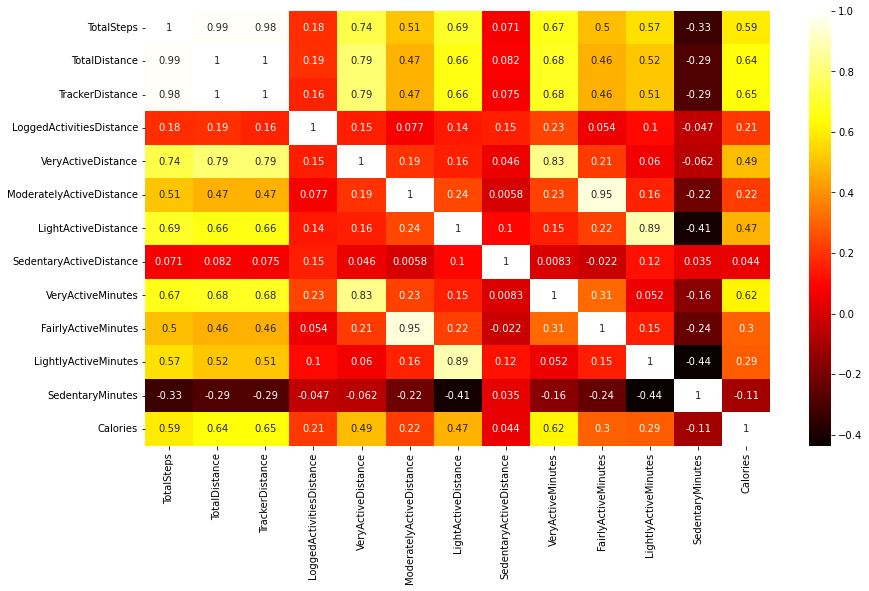

In [8]:
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(), annot=True, cmap="hot")
plt.show()# figure oluştudum ve Datasetin korolesyonunu aldım(verirler arasında birbirini etkileme oranı diyebilirim)

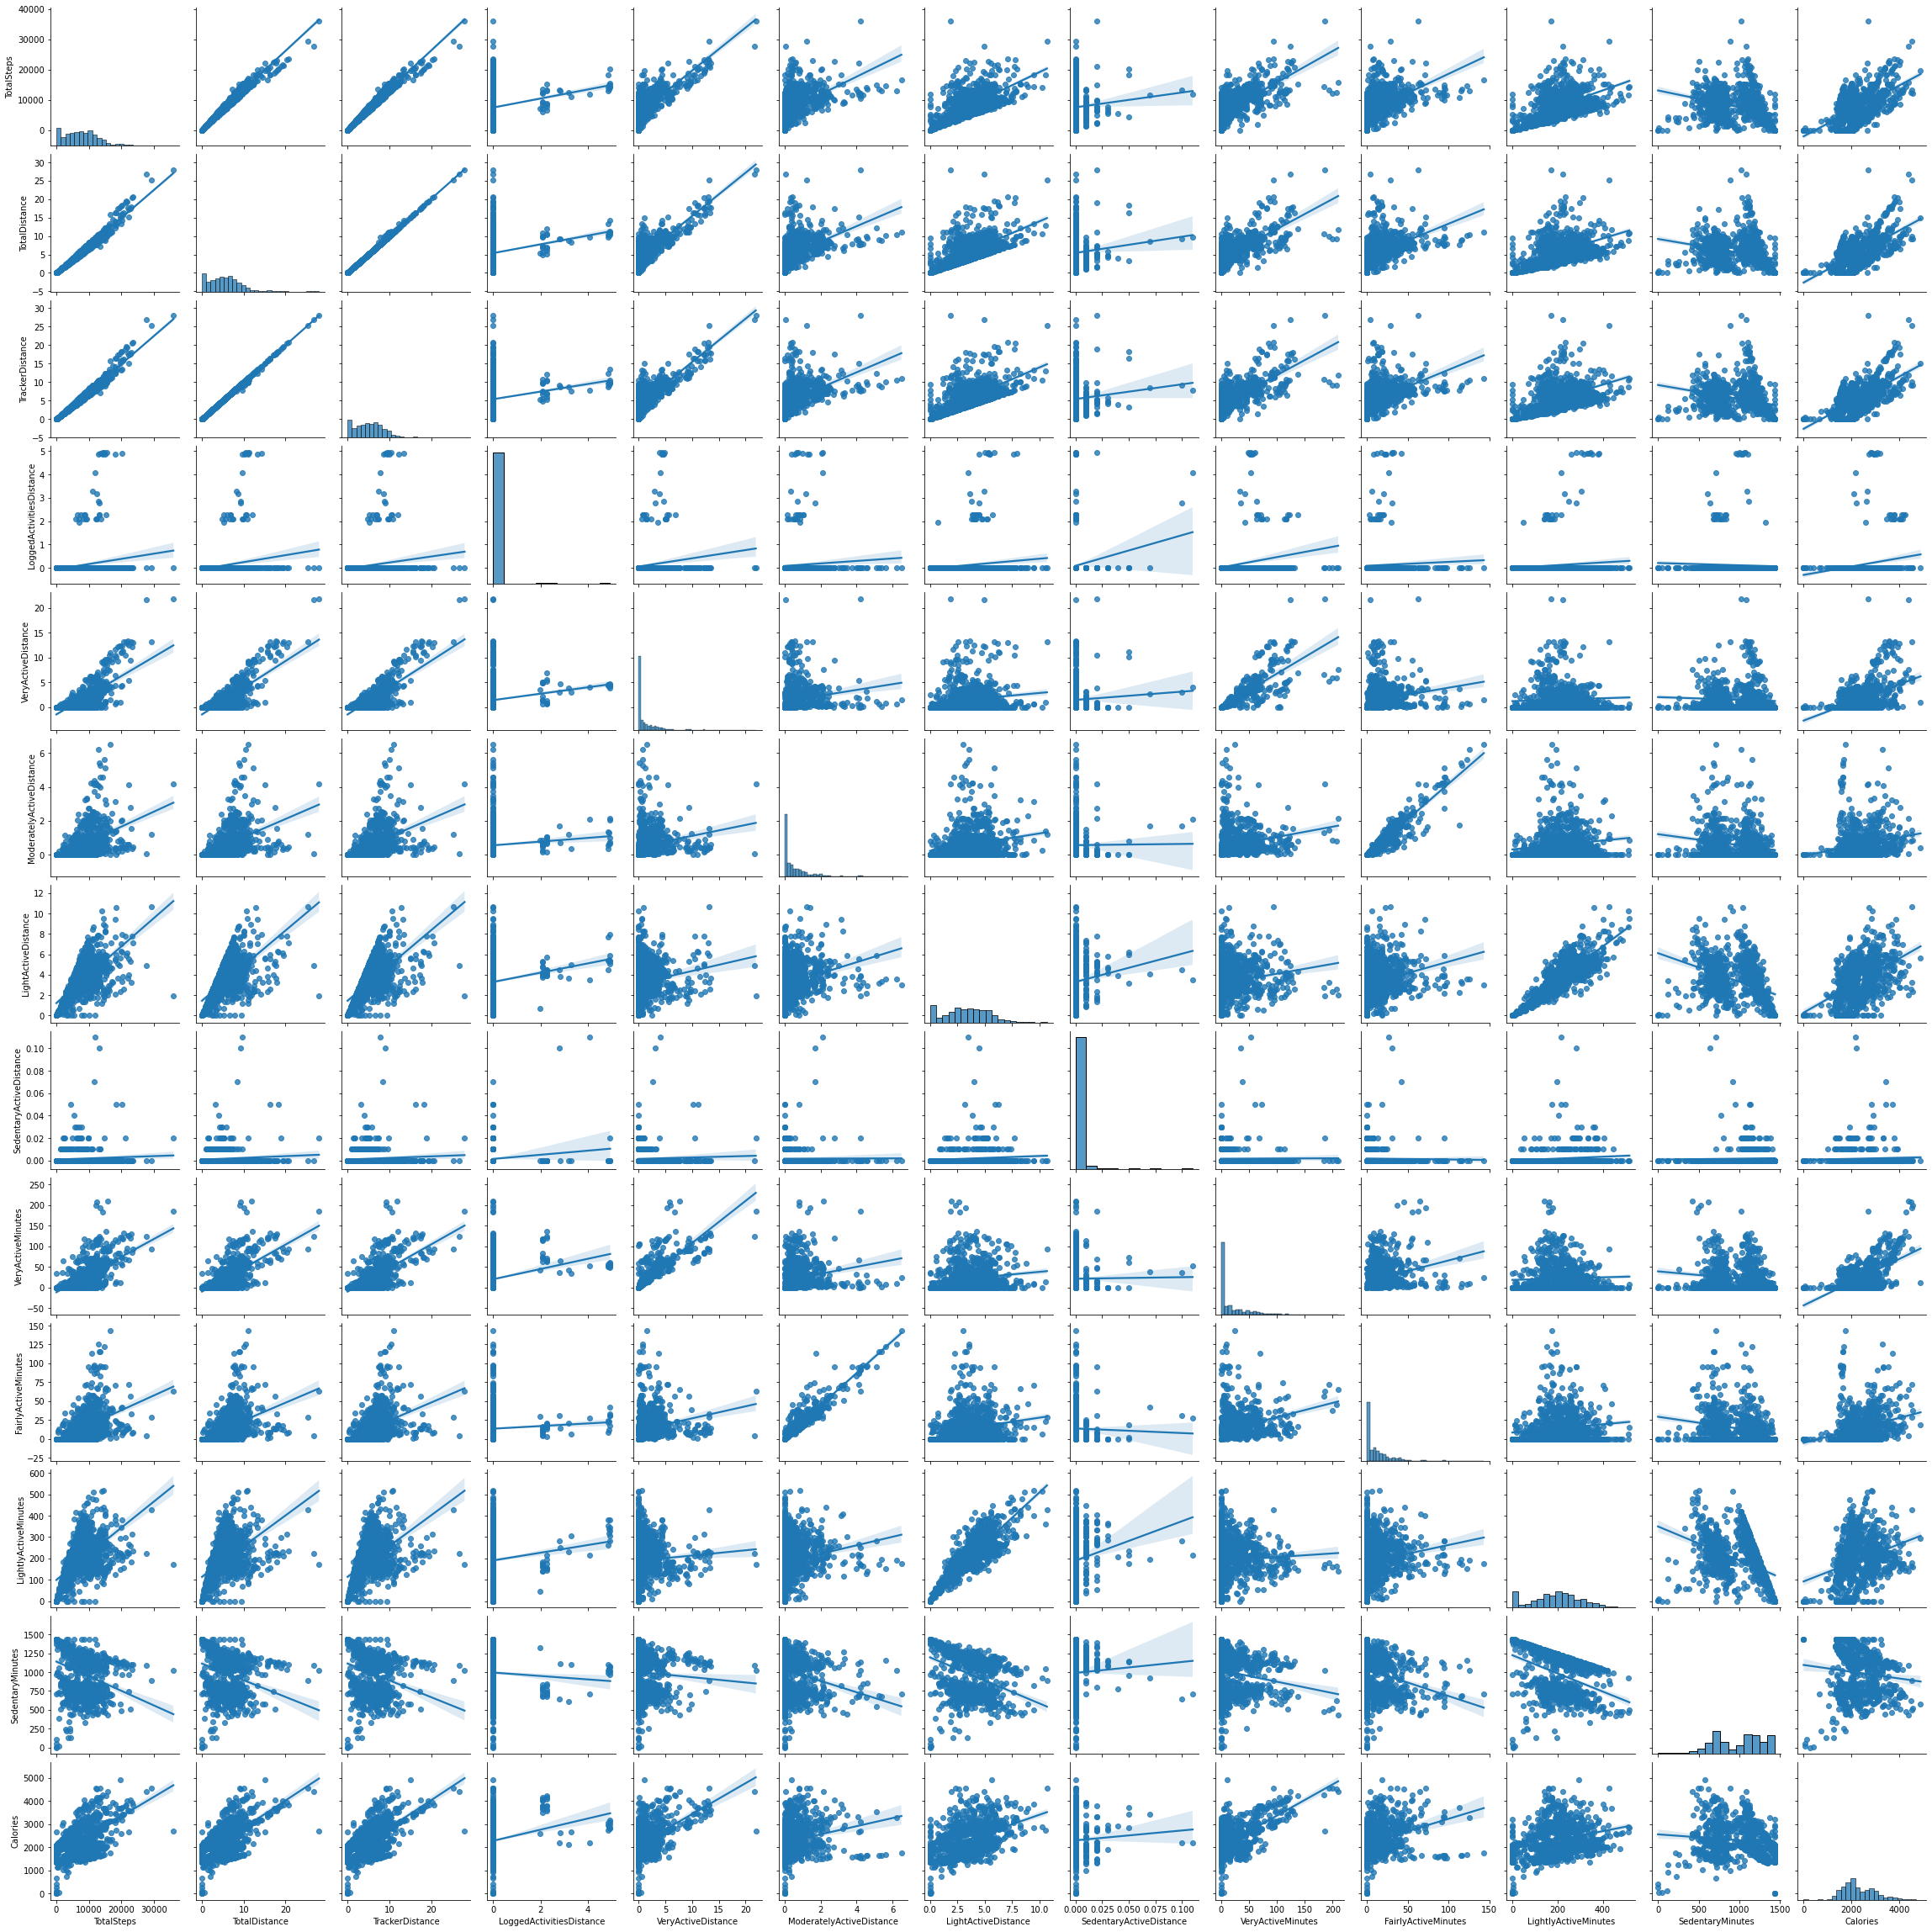

In [9]:
sns.pairplot(df, kind  ="reg");

### Aykırı değerleri gözlemliyorum

In [10]:
df=df.select_dtypes(include=['float64','int64'] )
df_tbl=df["TotalSteps"].copy()
df_tbl.head()#TotalsTeps de bulunan aykırı değerlere göz atacağım

0    13162
1    10735
2    10460
3     9762
4    12669
Name: TotalSteps, dtype: int64

<AxesSubplot:xlabel='TotalSteps'>

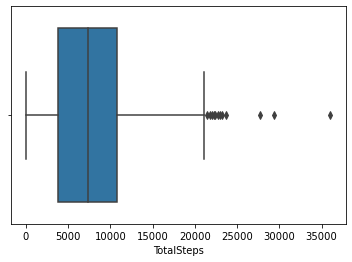

In [11]:
sns.boxplot(x=df_tbl)#Aykırı değerler hakkında bilgi almak için boxplot

In [12]:
Q1=df_tbl.quantile(0.25)
Q3=df_tbl.quantile(0.75)
IQR=Q3-Q1
print(Q1,IQR,Q3)
ust_sinir=Q3 + 1.5 * IQR
alt_sinir=Q1 - 1.5 * IQR
print("alt sınır: ",alt_sinir)
print("üst sınır: ",ust_sinir)#Verisetini çeyreklere bölerek alt ve üst sınırı belirledim

3789.75 6937.25 10727.0
alt sınır:  -6616.125
üst sınır:  21132.875


In [13]:
aykiri=((df_tbl < (alt_sinir)) | (df_tbl> (ust_sinir)))
df[aykiri]# Alt ve üst sınıra uymayan değerleri ayırdım

,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
50,36019,28.030001,28.030001,0.0,21.92,4.19,1.91,0.02,186,63,171,1020,2690
251,22244,15.080000,15.080000,0.0,5.45,4.10,5.53,0.00,66,72,268,968,2670
437,22770,17.540001,17.540001,0.0,9.45,2.77,5.33,0.00,120,56,260,508,4022
779,22359,17.190001,17.190001,0.0,12.54,0.63,4.02,0.00,125,14,223,741,3554
780,22988,17.950001,17.950001,0.0,13.13,1.55,3.26,0.00,129,33,182,1096,3577
794,22026,17.650000,17.650000,0.0,13.40,0.59,3.66,0.00,125,14,228,1073,3589
909,23186,20.400000,20.400000,0.0,12.22,0.34,7.82,0.00,85,7,312,1036,3921
913,29326,25.290001,25.290001,0.0,13.24,1.21,10.71,0.00,94,29,429,888,4547
924,23629,20.650000,20.650000,0.0,13.07,0.44,7.10,0.00,93,8,235,1104,3808
927,27745,26.719999,26.719999,0.0,21.66,0.08,4.93,0.00,124,4,223,1089,4398


In [14]:
clf = LocalOutlierFactor(n_neighbors = 20, contamination = 0.1)#Aykırı değerleri ayıklamak için oluşturdum

In [15]:
#her bir gözlem biriminin skoru
clf.fit_predict(df)
df_scores = clf.negative_outlier_factor_
df_scores[0:10]

array([-1.00567247, -1.01144075, -1.08688487, -1.03147873, -1.01279792,
       -1.08696616, -1.0173654 , -1.24693418, -1.00113968, -1.01733125])

In [16]:
np.sort(df_scores)[0:20]
esik_deger = np.sort(df_scores)[9]#9dan sonra kırılım olduğu için seçtim
aykiri_tf = df_scores > esik_deger
aykiri_tf# aykırı değerleri çektim

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,

In [17]:
#aykırı gözlemler
df[df_scores < esik_deger] # Üretilen score değerleri eşikten (dokuzuncu veriden) küçük mü diye kontrol ettim

,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
30,0,0.000000,0.000000,0.0,0.00,0.00,0.00,0.00,0,0,0,1440,0
50,36019,28.030001,28.030001,0.0,21.92,4.19,1.91,0.02,186,63,171,1020,2690
124,356,0.250000,0.250000,0.0,0.00,0.00,0.25,0.00,0,0,32,986,2151
366,475,0.340000,0.340000,0.0,0.00,0.04,0.29,0.00,0,11,31,1350,2207
636,0,0.000000,0.000000,0.0,0.00,0.00,0.00,0.00,33,0,0,1407,2664
653,0,0.000000,0.000000,0.0,0.00,0.00,0.00,0.00,0,0,0,1440,0
664,637,0.460000,0.460000,0.0,0.00,0.00,0.46,0.00,0,0,20,1420,1922
817,0,0.000000,0.000000,0.0,0.00,0.00,0.00,0.00,0,0,0,1440,0
879,0,0.000000,0.000000,0.0,0.00,0.00,0.00,0.00,0,0,0,1440,0


In [18]:
df  = df[df_scores > esik_deger]
df

,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,13162,8.500000,8.500000,0.0,1.88,0.55,6.06,0.00,25,13,328,728,1985
1,10735,6.970000,6.970000,0.0,1.57,0.69,4.71,0.00,21,19,217,776,1797
2,10460,6.740000,6.740000,0.0,2.44,0.40,3.91,0.00,30,11,181,1218,1776
3,9762,6.280000,6.280000,0.0,2.14,1.26,2.83,0.00,29,34,209,726,1745
4,12669,8.160000,8.160000,0.0,2.71,0.41,5.04,0.00,36,10,221,773,1863
...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,2847
936,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,3710
937,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,2832
938,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,3832


In [19]:
df.shape

(930, 13)

In [20]:
df=df.select_dtypes(include=['float64','int64'] )
df_tbl=df["TotalSteps"].copy()
df_tbl.head()

0    13162
1    10735
2    10460
3     9762
4    12669
Name: TotalSteps, dtype: int64

<AxesSubplot:xlabel='TotalSteps'>

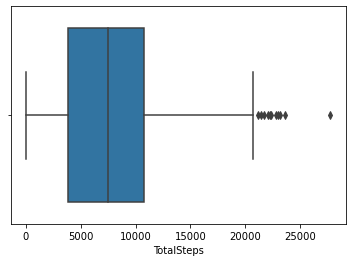

In [21]:
sns.boxplot(x=df_tbl)

### Linear Regression
Sadece TotalSteps ve Calories arasıdaki bağıntıyı kontrol ettim

#### Model
Model kurlumunu ve Dataset için gerekli olan ayrımları yaptım.
Eksik veri ayıklama, test verilerini ayırma işini burada hallettim

In [22]:
hit = pd.read_csv("Kalori.csv",usecols = [2,3,4,5,6,7,8,9,10,11,12,13,14])
df = hit.copy()
df= df.dropna()#Datasette boş olan değerleri çıkardım

y = df.drop(["TotalSteps"], axis = 1)#total_stepsi çıkararak y sütununa ekledik
X_ = df.drop(["Calories"], axis = 1)
x_train, x_test, y_train, y_test = train_test_split(X_ , y , test_size=0.3 , random_state=42)# test verilerini oluşturduk

print("X_train", x_train.shape)
print("y_train",y_train.shape)
print("X_test",x_test.shape)
print("y_test",y_test.shape)
training = df.copy()
print("training", training.shape)

X_train (658, 12)
y_train (658, 12)
X_test (282, 12)
y_test (282, 12)
training (940, 13)


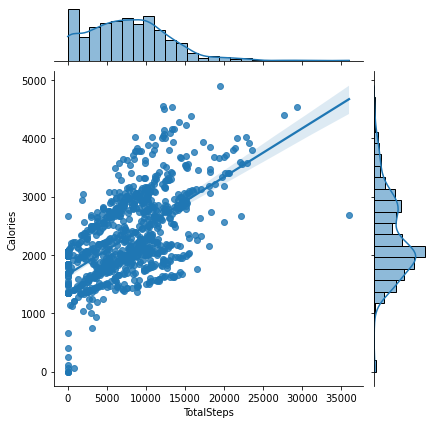

In [23]:
sns.jointplot(x = "TotalSteps", y = "Calories", data = df, kind = "reg")#Aralarındaki bağıntı

In [24]:
X = df[["TotalSteps"]]
X[0:5]#Adımın ilk beş değeri

,TotalSteps
0,13162
1,10735
2,10460
3,9762
4,12669


In [25]:
X = sm.add_constant(data=X)
X[0:5]#Daha iyi gözlem  için dayanak olması içina const ekledim

,const,TotalSteps
0,1.0,13162
1,1.0,10735
2,1.0,10460
3,1.0,9762
4,1.0,12669


In [26]:
from warnings import filterwarnings
filterwarnings('ignore')
#uyarıları kapatmak icin

In [27]:
#bağımlı değişkenimizi de alıyoruz
y = df["Calories"]
y[0:5]# Caloriesin ilk beş değeri

0    1985
1    1797
2    1776
3    1745
4    1863
Name: Calories, dtype: int64

In [28]:
#modelin kurulması
lm = sm.OLS(y,X)
#modelin fit edilmesi
model = lm.fit()
#model ciktilarinin alinmasi
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Calories   R-squared:                       0.350
Model:                            OLS   Adj. R-squared:                  0.349
Method:                 Least Squares   F-statistic:                     505.0
Date:                Wed, 08 Jun 2022   Prob (F-statistic):           8.20e-90
Time:                        17:00:24   Log-Likelihood:                -7313.0
No. Observations:                 940   AIC:                         1.463e+04
Df Residuals:                     938   BIC:                         1.464e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1665.7427     34.100     48.849      0.000    1598.822    1732.663
TotalSteps     0.0835      0.004     22.472      0.000       0.076       0.091
==============================================================================
Omnibus:                        4.839   Durbin-Watson:                   0.441
Prob(Omnibus):                  0.089   Jarque-Bera (JB):                4.881
Skew:                           0.130   Prob(JB):                       0.0871
Kurtosis:                       3.238   Cond. No.                     1.66e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.66e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
#sadece katsayıları görelim 
model.params

const         1665.742677
TotalSteps       0.083513
dtype: float64

In [30]:
model.mse_model

169482862.16418338

In [31]:
#düzeltilmiş rkare değeri
model.rsquared_adj

0.34925978659218193

In [32]:
#modelden tahmin edilen y değerleri
model.fittedvalues[0:5]

0    2764.944344
1    2562.257636
2    2539.291487
3    2480.999224
4    2723.772302
dtype: float64

In [33]:
#gercek y degerleri
y[0:5]

0    1985
1    1797
2    1776
3    1745
4    1863
Name: Calories, dtype: int64

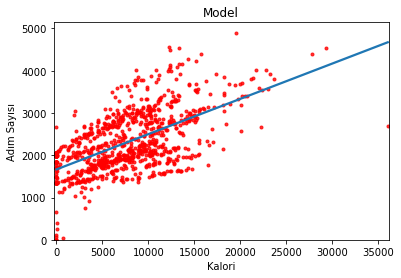

In [34]:
#modelin görsel olarak ifade edilmesi
g = sns.regplot(df["TotalSteps"], df["Calories"], ci=None, scatter_kws={'color':'r', 's':9})
g.set_title("Model")
g.set_ylabel("Adım Sayısı")
g.set_xlabel("Kalori")
import matplotlib.pyplot as plt
plt.xlim(-300,36100)
plt.ylim(bottom=0);

In [35]:
import statsmodels.formula.api as smf
lm = smf.ols("Calories ~ TotalSteps", df)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Calories   R-squared:                       0.350
Model:                            OLS   Adj. R-squared:                  0.349
Method:                 Least Squares   F-statistic:                     505.0
Date:                Wed, 08 Jun 2022   Prob (F-statistic):           8.20e-90
Time:                        17:00:24   Log-Likelihood:                -7313.0
No. Observations:                 940   AIC:                         1.463e+04
Df Residuals:                     938   BIC:                         1.464e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1665.7427     34.100     48.849      0.000    1598.822    1732.663
TotalSteps     0.0835      0.004     22.472      0.000       0.076       0.091
==============================================================================
Omnibus:                        4.839   Durbin-Watson:                   0.441
Prob(Omnibus):                  0.089   Jarque-Bera (JB):                4.881
Skew:                           0.130   Prob(JB):                       0.0871
Kurtosis:                       3.238   Cond. No.                     1.66e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.66e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
mse = mean_squared_error(y, model.fittedvalues)
#gerçek değerler ile tahmin edilen değerler arasındaki farkların karelerinin ortalaması
mse

334914.03994643234

In [37]:
#karşılaştırma tablosu
k_t = pd.DataFrame({"gercek_y": y[0:10],
                   "tahmin_y": model.predict(X)[0:10]})
k_t

,gercek_y,tahmin_y
0,1985,2764.944344
1,1797,2562.257636
2,1776,2539.291487
3,1745,2480.999224
4,1863,2723.772302
5,1728,2476.238968
6,1921,2753.001946
7,2035,2960.699450
8,1786,2546.306602
9,1775,2485.759480


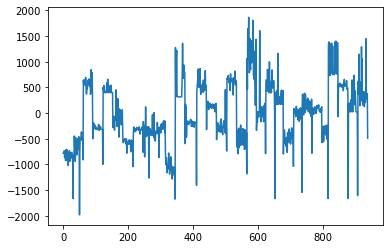

In [38]:
#artıkların görselleştirilmesi
#bu hatalar verisetindeki aykırı değerlerden mi kaynaklanıyor gibi soruların sorulabileceği 
#ve bu sorulara yanıt aramaya bizi sevk edecek gözlemler
plt.plot(model.resid)

In [39]:
k_t["hata"] = k_t["gercek_y"] - k_t["tahmin_y"]
k_t["hata_kare"] = k_t["hata"]**2
k_t

,gercek_y,tahmin_y,hata,hata_kare
0,1985,2764.944344,-779.944344,608313.179563
1,1797,2562.257636,-765.257636,585619.249850
2,1776,2539.291487,-763.291487,582613.893906
3,1745,2480.999224,-735.999224,541694.857743
4,1863,2723.772302,-860.772302,740928.955040
5,1728,2476.238968,-748.238968,559861.552617
6,1921,2753.001946,-832.001946,692227.238479
7,2035,2960.699450,-925.699450,856919.471848
8,1786,2546.306602,-760.306602,578066.128409
9,1775,2485.759480,-710.759480,505179.039023


In [40]:
#toplam hata
np.sum(k_t["hata_kare"])

6251423.566478014

In [41]:
#hata kareler ortalaması
np.mean(k_t["hata_kare"])

625142.3566478014

In [42]:
#hata kareler ortalamasının karekoku
np.sqrt(np.mean(k_t["hata_kare"]))

790.6594441653127

In [43]:
rmseTrain=np.sqrt( mean_squared_error(y, model.fittedvalues))
print("Eğitim Hatası: ",rmseTrain)

Eğitim Hatası:  578.717582199152


### Multi Linear Regression

#### Model
Bütün verileri kullanarak Linear Reg yaptım

In [44]:
hit = pd.read_csv("Kalori.csv",usecols = [2,3,4,5,6,7,8,9,10,11,12,13,14])
df = hit.copy()
df.dropna(inplace=True)
y = df["Calories"]
X_ = df.drop(["Calories"], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X_ , y , test_size=0.3 , random_state=42)

print("X_train", X_train.shape)
print("y_train",y_train.shape)
print("X_test",X_test.shape)
print("y_test",y_test.shape)
training = df.copy()
print("training", training.shape)

X_train (658, 12)
y_train (658,)
X_test (282, 12)
y_test (282,)
training (940, 13)


#### Statsmodel

In [45]:
lm = sm.OLS(y_train, X_train)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               Calories   R-squared (uncentered):                   0.971
Model:                            OLS   Adj. R-squared (uncentered):              0.970
Method:                 Least Squares   F-statistic:                              1794.
Date:                Wed, 08 Jun 2022   Prob (F-statistic):                        0.00
Time:                        17:00:25   Log-Likelihood:                         -4894.3
No. Observations:                 658   AIC:                                      9813.
Df Residuals:                     646   BIC:                                      9866.
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
TotalSteps                  -0.3778      0.025    -14.955      0.000      -0.427      -0.328
TotalDistance              -93.1376    298.816     -0.312      0.755    -679.905     493.629
TrackerDistance            780.0487    290.327      2.687      0.007     209.950    1350.147
LoggedActivitiesDistance    99.9483     56.455      1.770      0.077     -10.910     210.806
VeryActiveDistance        -338.0730     26.712    -12.656      0.000    -390.525    -285.621
ModeratelyActiveDistance  -317.6942     67.017     -4.741      0.000    -449.291    -186.098
LightActiveDistance        -25.8546     30.055     -0.860      0.390     -84.872      33.163
SedentaryActiveDistance  -4111.3281   2477.996     -1.659      0.098   -8977.227     754.571
VeryActiveMinutes           21.2275      1.210     17.542      0.000      18.851      23.604
FairlyActiveMinutes         12.7822      2.794      4.575      0.000       7.296      18.269
LightlyActiveMinutes         1.9703      0.358      5.505      0.000       1.268       2.673
SedentaryMinutes             1.1664      0.025     46.541      0.000       1.117       1.216
==============================================================================
Omnibus:                        7.363   Durbin-Watson:                   1.937
Prob(Omnibus):                  0.025   Jarque-Bera (JB):               10.543
Skew:                           0.035   Prob(JB):                      0.00514
Kurtosis:                       3.616   Cond. No.                     1.43e+06
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.43e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### TotalDistance değerini çıkarıp tekrar deniyoruz

In [46]:
hit = pd.read_csv("Kalori.csv",usecols = [2,4,5,6,7,8,9,10,11,12,13,14])
df = hit.copy()
df.dropna(inplace=True)
y = df["Calories"]
X_ = df.drop(["Calories"], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X_ , y , test_size=0.25 , random_state=42)

print("X_train", X_train.shape)
print("y_train",y_train.shape)
print("X_test",X_test.shape)
print("y_test",y_test.shape)
training = df.copy()
print("training", training.shape)

X_train (705, 11)
y_train (705,)
X_test (235, 11)
y_test (235,)
training (940, 12)


In [47]:
lm = sm.OLS(y_train, X_train)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               Calories   R-squared (uncentered):                   0.970
Model:                            OLS   Adj. R-squared (uncentered):              0.969
Method:                 Least Squares   F-statistic:                              2030.
Date:                Wed, 08 Jun 2022   Prob (F-statistic):                        0.00
Time:                        17:00:25   Log-Likelihood:                         -5256.0
No. Observations:                 705   AIC:                                  1.053e+04
Df Residuals:                     694   BIC:                                  1.058e+04
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
TotalSteps                  -0.3716      0.023    -15.883      0.000      -0.418      -0.326
TrackerDistance            679.7976     37.249     18.250      0.000     606.663     752.932
LoggedActivitiesDistance    80.7997     25.804      3.131      0.002      30.136     131.464
VeryActiveDistance        -338.8609     25.893    -13.087      0.000    -389.699    -288.023
ModeratelyActiveDistance  -317.7977     63.694     -4.989      0.000    -442.853    -192.742
LightActiveDistance        -27.3952     30.006     -0.913      0.362     -86.308      31.518
SedentaryActiveDistance  -4558.7775   2495.039     -1.827      0.068   -9457.508     339.953
VeryActiveMinutes           21.3239      1.088     19.599      0.000      19.188      23.460
FairlyActiveMinutes         12.8723      2.628      4.898      0.000       7.712      18.033
LightlyActiveMinutes         1.9731      0.348      5.664      0.000       1.289       2.657
SedentaryMinutes             1.1646      0.025     47.208      0.000       1.116       1.213
==============================================================================
Omnibus:                       11.616   Durbin-Watson:                   1.922
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               19.702
Skew:                          -0.007   Prob(JB):                     5.27e-05
Kurtosis:                       3.819   Cond. No.                     1.47e+06
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.47e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Model kurulumunu ve test, eğitim verilerini girdim

In [48]:
hit = pd.read_csv("Kalori.csv",usecols = [2,3,4,5,6,7,8,9,10,11,12,13,14])
df = hit.copy()
df.dropna(inplace=True)
y = df["Calories"]
X_ = df.drop(["Calories"], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X_ , y , test_size=0.3 , random_state=42)

print("X_train", X_train.shape)
print("y_train",y_train.shape)
print("X_test",X_test.shape)
print("y_test",y_test.shape)
training = df.copy()
print("training", training.shape)

X_train (658, 12)
y_train (658,)
X_test (282, 12)
y_test (282,)
training (940, 13)


In [49]:
lm = LinearRegression()
model = lm.fit(X_train, y_train)

Modelin hata çıktılarını aldım

In [50]:
y_pred = model.predict(X_train)
print("Train R2 Score: ", r2_score(y_train, y_pred))
print("----"*30)
y_pred = model.predict(X_test)
print("Test R2 Score: ", r2_score(y_test, y_pred))
print("----"*30)
y_pred = model.predict(X_test)
print("Ortalama Test Hatası: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("----"*30)
y_pred = model.predict(X_train)
print("Ortalama Eğitim Hatası: ", np.sqrt(mean_squared_error(y_train,y_pred)))
print("----"*30)
print(model.intercept_)
print(model.coef_)

Train R2 Score:  0.7720841933470152
------------------------------------------------------------------------------------------------------------------------
Test R2 Score:  0.7144237378177963
------------------------------------------------------------------------------------------------------------------------
Ortalama Test Hatası:  376.74835626758653
------------------------------------------------------------------------------------------------------------------------
Ortalama Eğitim Hatası:  345.2229566890698
------------------------------------------------------------------------------------------------------------------------
1168.8790609730333
[-3.96929915e-01  4.85340713e+02  2.17723128e+02  2.91102815e+01
 -3.17202187e+02 -3.18629253e+02 -1.67800405e+01 -6.34085085e+02
  1.90656185e+01  1.12100782e+01  4.22496756e-01  3.88030790e-01]


In [51]:
df.head()

,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


#### Model Tuning

In [52]:
X = df.drop('Calories', axis=1)
y = df["Calories"]
X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size=0.25, random_state=42)
lm = LinearRegression() 
lojj_tunned = lm.fit(X_train, y_train)

In [53]:
rmseTrain=np.sqrt(mean_squared_error(y_train, lojj_tunned.predict(X_train)))
print("Eğitim Hatası: ",rmseTrain)
rmseTest=np.sqrt(mean_squared_error(y_test, lojj_tunned.predict(X_test)))
print("Test Hatası: ",rmseTest)
lojj_tunned.score(X_train, y_train)

Eğitim Hatası:  350.178622323032
Test Hatası:  368.39102523414084


0.7657595661779345

In [54]:
#eğitim verileri için çapraz doğrulama ile elde edilmiş ortalama r2 skoru
cross_val_score(model, X_train, y_train, cv = 10, scoring = "r2").mean()

0.7446432351905606

In [55]:
#neg_mean_squared_error'da sonuc negatif olacağı için üstte (-) ile çarpıyoruz 
rmseTrain=np.sqrt(-cross_val_score(model, 
                X_train, 
                y_train, 
                cv = 10, 
                scoring = "neg_mean_squared_error")).mean()
print("Eğitim Hatası: ",rmseTrain)
rmseTest=np.sqrt(-cross_val_score(model, 
                X_test, 
                y_test, 
                cv = 10, 
                scoring = "neg_mean_squared_error")).mean()
print("Test Hatası: ",rmseTest)

Eğitim Hatası:  358.0743022408574
Test Hatası:  388.1312792541829


In [56]:
#karşılaştırma tablosu
k_t = pd.DataFrame({"Gercek": y[0:10],
                   "Tahmin": lojj_tunned.predict(X)[0:10]})
k_t["hata"] = k_t["Gercek"] - k_t["Tahmin"]
k_t["hata_kare"] = k_t["hata"]**2
k_t

,Gercek,Tahmin,hata,hata_kare
0,1985,2102.212988,-117.212988,13738.884599
1,1797,2032.636047,-235.636047,55524.346696
2,1776,2036.260772,-260.260772,67735.669680
3,1745,1905.356964,-160.356964,25714.356044
4,1863,2009.735952,-146.735952,21531.439682
5,1728,1822.282551,-94.282551,8889.199405
6,1921,2254.607848,-333.607848,111294.196108
7,2035,2067.313623,-32.313623,1044.170205
8,1786,1921.249572,-135.249572,18292.446717
9,1775,1992.018628,-217.018628,47097.084864


### PCR (Temel Bileşen Regresyonu - Principal Component Regression)

In [57]:
hit = pd.read_csv("Kalori.csv",usecols = [2,3,4,5,6,7,8,9,10,11,12,13,14])
df = hit.copy()
df.dropna(inplace=True)
y = df["Calories"]
X_ = df.drop(["Calories"], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X_ , y , test_size=0.3 , random_state=42)

print("X_train", X_train.shape)
print("y_train",y_train.shape)
print("X_test",X_test.shape)
print("y_test",y_test.shape)
training = df.copy()
print("training", training.shape)

X_train (658, 12)
y_train (658,)
X_test (282, 12)
y_test (282,)
training (940, 13)


In [58]:
pca = PCA()
#indirgenmiş veriseti (transform indirgeme islemi)(scale islemi veri standardizasyonu yapmayi saglar)

X_reduced_train = pca.fit_transform(scale(X_train))
X_reduced_test = pca.fit_transform(scale(X_test))
#ilk gözlemin tüm bileşenlerde incelenmesi
X_reduced_train[0:1,:]
#Normalde PCA n_components yani bileşen sayısı parametresini alır. Eğer parametreyi vermezsek bütün bileşenleri kullanır.

array([[-1.24039537e+00, -1.06522938e+00, -7.24544975e-01,
         9.92888434e-01, -7.96840442e-01, -6.02042133e-02,
         2.97050068e-01, -4.99564790e-01, -3.03769223e-02,
         1.68493221e-02,  6.36792408e-02,  7.90948385e-04]])

In [59]:
#açıklanan varyans oranı
np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 4)*100)
#1. bilesen verisetindeki varyansın %38ini ifade ettiğini belirtir.
#2. bileşenin kendinden önceki bileşenle birlikte verisetindeki varyansın %59unu ifade ettiğini belirtir.
#3. bileşenin kendinden önceki bileşenlerle birlikte verisetindeki varyansın %70unu ifade ettiğini belirtir.
#...

#burada 10 bileşenle verisetindeki varyansın %97'sini ifade edebiliyoruz.

array([ 45.09,  60.72,  74.31,  84.75,  91.34,  96.27,  98.35,  99.43,
        99.73,  99.92, 100.  , 100.  ])

In [60]:
lm = LinearRegression()
pcr_model = lm.fit(X_reduced_train, y_train)
print(pcr_model.intercept_)
print(pcr_model.coef_)

2298.079027355623
[ 196.51068872   57.74531498  -93.87173944   21.63690646   14.85705073
  -82.09665696  398.70667891  597.67886351  470.06760902   33.40056828
 2977.01800621 -856.6694955 ]


#### Tahmin

In [61]:
y_pred = pcr_model.predict(X_reduced_train)
y_pred[0:5]

array([2070.45403391, 2140.7736594 , 2232.47664307, 1737.47388261,
       2448.64021164])

In [62]:
y_pred = pcr_model.predict(X_reduced_train)
print("Train R2 Score: ", r2_score(y_train, y_pred))
print("----"*30)
y_pred = pcr_model.predict(X_reduced_test)
print("Test R2 Score: ", r2_score(y_test, y_pred))
print("----"*30)
y_pred = pcr_model.predict(X_reduced_test)
print("Ortalama Test Hatası: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("----"*30)
y_pred = pcr_model.predict(X_reduced_train)
print("Ortalama Eğitim Hatası: ", np.sqrt(mean_squared_error(y_train,y_pred)))
print("----"*30)
print(pcr_model.intercept_)
print(pcr_model.coef_)

Train R2 Score:  0.7720841933470153
------------------------------------------------------------------------------------------------------------------------
Test R2 Score:  0.6146475553365407
------------------------------------------------------------------------------------------------------------------------
Ortalama Test Hatası:  437.64238180397103
------------------------------------------------------------------------------------------------------------------------
Ortalama Eğitim Hatası:  345.22295668906975
------------------------------------------------------------------------------------------------------------------------
2298.079027355623
[ 196.51068872   57.74531498  -93.87173944   21.63690646   14.85705073
  -82.09665696  398.70667891  597.67886351  470.06760902   33.40056828
 2977.01800621 -856.6694955 ]


In [63]:
df["Calories"].mean()

2303.609574468085

#### Model Tuning

In [64]:
pca2 = PCA()
X_reduced_test = pca2.fit_transform(scale(X_test))

In [65]:
lm = LinearRegression()
#tüm bileşenlerle ile deneyelim
pcr_tuned = lm.fit(X_reduced_train, y_train)
y_pred = pcr_tuned.predict(X_reduced_test)
print(np.sqrt(mean_squared_error(y_test, y_pred)))

437.64238180397103


In [66]:
#cross validation sayesinde olası bileşen sayılarıni gonderip optimum bileşen sayısını belirleyebiliriz 
from sklearn import model_selection
cv_10 = model_selection.KFold(n_splits = 10,
                             shuffle = True,
                             random_state = 42)
lm = LinearRegression()
RMSE = []


for i in np.arange(1, X_reduced_train.shape[1] + 1):
    
    score = np.sqrt(-1*model_selection.cross_val_score(lm, 
                                                       X_reduced_train[:,:i], 
                                                       y_train.ravel(), 
                                                       cv=cv_10, 
                                                       scoring='neg_mean_squared_error').mean())
    RMSE.append(score)

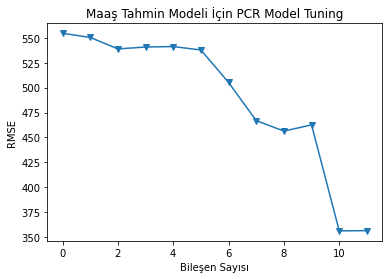

In [67]:
import matplotlib.pyplot as plt
plt.plot(RMSE, '-v')
plt.xlabel('Bileşen Sayısı')
plt.ylabel('RMSE')
plt.title('Maaş Tahmin Modeli İçin PCR Model Tuning');

en iyi değer 10 gibi görünüyor

In [68]:
y_pred = pcr_tuned.predict(X_reduced_train)
print("Train R2 Score: ", r2_score(y_train, y_pred))
print("----"*30)
y_pred = pcr_tuned.predict(X_reduced_test)
print("Test R2 Score: ", r2_score(y_test, y_pred))
print("----"*30)
y_pred = pcr_tuned.predict(X_reduced_test)
print("Ortalama Test Hatası: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("----"*30)
y_pred = pcr_tuned.predict(X_reduced_train)
print("Ortalama Eğitim Hatası: ", np.sqrt(mean_squared_error(y_train,y_pred)))
print("----"*30)
print(pcr_tuned.intercept_)
print(pcr_tuned.coef_)

Train R2 Score:  0.7720841933470153
------------------------------------------------------------------------------------------------------------------------
Test R2 Score:  0.6146475553365407
------------------------------------------------------------------------------------------------------------------------
Ortalama Test Hatası:  437.64238180397103
------------------------------------------------------------------------------------------------------------------------
Ortalama Eğitim Hatası:  345.22295668906975
------------------------------------------------------------------------------------------------------------------------
2298.079027355623
[ 196.51068872   57.74531498  -93.87173944   21.63690646   14.85705073
  -82.09665696  398.70667891  597.67886351  470.06760902   33.40056828
 2977.01800621 -856.6694955 ]


### PLS (Kısmi En Küçük Kareler Regresyonu)

In [69]:
hit = pd.read_csv("Kalori.csv",usecols = [2,3,4,5,6,7,8,9,10,11,12,13,14])
df = hit.copy()
df.dropna(inplace=True)
y = df["Calories"]
X_ = df.drop(["Calories"], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X_ , y , test_size=0.3 , random_state=42)

print("X_train", X_train.shape)
print("y_train",y_train.shape)
print("X_test",X_test.shape)
print("y_test",y_test.shape)
training = df.copy()
print("training", training.shape)

X_train (658, 12)
y_train (658,)
X_test (282, 12)
y_test (282,)
training (940, 13)


In [70]:
#tum bilesenler alindi
pls_model = PLSRegression().fit(X_train, y_train)

In [71]:
X_train.head()

,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes
296,4747,3.24,3.24,0.0,0.00,0.00,3.23,0.01,0,0,280,1160
417,4660,3.58,3.58,0.0,0.00,0.00,3.58,0.00,0,0,201,721
307,7396,5.07,5.07,0.0,1.40,0.08,3.58,0.00,20,2,303,1115
133,149,0.10,0.10,0.0,0.00,0.00,0.10,0.00,0,0,10,1430
514,6530,5.30,5.30,0.0,0.31,2.05,2.94,0.00,4,41,144,901


In [72]:
y_pred = pls_model.predict(X_train)
print("Train R2 Score: ", r2_score(y_train, y_pred))
print("----"*30)
y_pred = pls_model.predict(X_test)
print("Test R2 Score: ", r2_score(y_test, y_pred))
print("----"*30)
y_pred = pls_model.predict(X_test)
print("Ortalama Test Hatası: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("----"*30)
y_pred = pls_model.predict(X_train)
print("Ortalama Eğitim Hatası: ", np.sqrt(mean_squared_error(y_train,y_pred)))
print("----"*30)
print(pls_model.coef_)

Train R2 Score:  0.5048045982699929
------------------------------------------------------------------------------------------------------------------------
Test R2 Score:  0.4419546191038515
------------------------------------------------------------------------------------------------------------------------
Ortalama Test Hatası:  526.6536186297172
------------------------------------------------------------------------------------------------------------------------
Ortalama Eğitim Hatası:  508.8628506154029
------------------------------------------------------------------------------------------------------------------------
[[ 61.05755062]
 [104.30083675]
 [105.08796892]
 [ 62.05717557]
 [ 66.47046573]
 [-54.30863021]
 [ 92.51595716]
 [  8.67213801]
 [182.89614098]
 [ 15.56791715]
 [  2.15010156]
 [ 84.92790972]]


#### Model Tuning

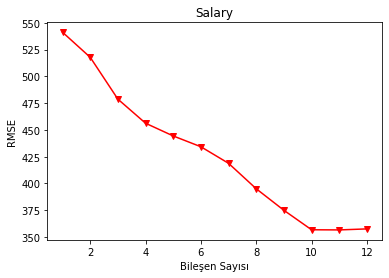

In [73]:
#CV
cv_10 = model_selection.KFold(n_splits=10, shuffle=True, random_state=1)


#Hata hesaplamak için döngü
RMSE = []

for i in np.arange(1, X_train.shape[1] + 1):
    pls = PLSRegression(n_components=i)
    score = np.sqrt(-1*cross_val_score(pls, X_train, y_train, cv=cv_10, scoring='neg_mean_squared_error').mean())
    RMSE.append(score)

#Sonuçların Görselleştirilmesi
import matplotlib.pyplot as plt
plt.plot(np.arange(1, X_train.shape[1] + 1), np.array(RMSE), '-v', c = "r")
plt.xlabel('Bileşen Sayısı')
plt.ylabel('RMSE')
plt.title('Salary');

In [74]:
pls_model = PLSRegression(n_components = 10).fit(X_train, y_train)

In [75]:
y_pred = pls_model.predict(X_train)
print("Train R2 Score: ", r2_score(y_train, y_pred))
print("----"*30)
y_pred = pls_model.predict(X_test)
print("Test R2 Score: ", r2_score(y_test, y_pred))
print("----"*30)
y_pred = pls_model.predict(X_test)
print("Ortalama Test Hatası: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("----"*30)
y_pred = pls_model.predict(X_train)
print("Ortalama Eğitim Hatası: ", np.sqrt(mean_squared_error(y_train,y_pred)))
print("----"*30)
print(pls_model.coef_)

Train R2 Score:  0.771952365631972
------------------------------------------------------------------------------------------------------------------------
Test R2 Score:  0.7151428914695903
------------------------------------------------------------------------------------------------------------------------
Ortalama Test Hatası:  376.27368315717763
------------------------------------------------------------------------------------------------------------------------
Ortalama Eğitim Hatası:  345.3227816536733
------------------------------------------------------------------------------------------------------------------------
[[-2070.97248164]
 [ 1371.20182606]
 [ 1472.28007883]
 [   36.21643332]
 [ -881.1559544 ]
 [ -287.67426959]
 [  -41.42875914]
 [   -4.97584764]
 [  634.09570784]
 [  234.07360372]
 [   48.6282723 ]
 [  119.7786479 ]]


### Ridge Regression

In [76]:
hit = pd.read_csv("Kalori.csv",usecols = [2,3,4,5,6,7,8,9,10,11,12,13,14])
df = hit.copy()
df.dropna(inplace=True)
y = df["Calories"]
X_ = df.drop(["Calories"], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X_ , y , test_size=0.3 , random_state=42)

print("X_train", X_train.shape)
print("y_train",y_train.shape)
print("X_test",X_test.shape)
print("y_test",y_test.shape)
training = df.copy()
print("training", training.shape)

X_train (658, 12)
y_train (658,)
X_test (282, 12)
y_test (282,)
training (940, 13)


In [77]:
#alpha=lambda
ridge_model = Ridge(alpha = 0.1).fit(X_train, y_train)
ridge_model

Ridge(alpha=0.1)

In [78]:
ridge_model.coef_

array([-3.96327030e-01,  4.77792669e+02,  2.24175635e+02,  2.98774059e+01,
       -3.16744234e+02, -3.18497536e+02, -1.63395641e+01, -1.40060759e+02,
        1.90537639e+01,  1.12147573e+01,  4.13897928e-01,  3.87096099e-01])

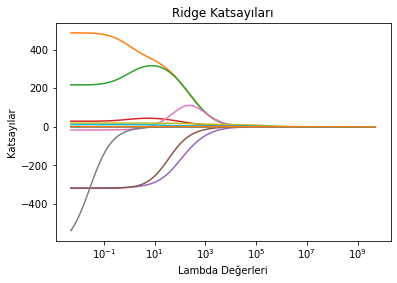

In [79]:
#belirlenen aralıkta lambda değerleri oluşturuyoruz
lambdalar = 10**np.linspace(10,-2,100)*0.5 

ridge_model = Ridge()
katsayilar = []

for i in lambdalar:
    ridge_model.set_params(alpha = i)
    ridge_model.fit(X_train, y_train) 
    katsayilar.append(ridge_model.coef_) 
    

import matplotlib.pyplot as plt    
ax = plt.gca()
ax.plot(lambdalar, katsayilar) 
ax.set_xscale('log') 

plt.xlabel('Lambda Değerleri')
plt.ylabel('Katsayılar')
plt.title('Ridge Katsayıları');

In [80]:
y_pred = ridge_model.predict(X_train)
print("Train R2 Score: ", r2_score(y_train, y_pred))
print("----"*30)
y_pred = ridge_model.predict(X_test)
print("Test R2 Score: ", r2_score(y_test, y_pred))
print("----"*30)
y_pred = ridge_model.predict(X_test)
print("Ortalama Test Hatası: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("----"*30)
y_pred = ridge_model.predict(X_train)
print("Ortalama Eğitim Hatası: ", np.sqrt(mean_squared_error(y_train,y_pred)))
print("----"*30)
print(ridge_model.intercept_)
print(ridge_model.coef_)

Train R2 Score:  0.772083442097061
------------------------------------------------------------------------------------------------------------------------
Test R2 Score:  0.7143312605064718
------------------------------------------------------------------------------------------------------------------------
Ortalama Test Hatası:  376.80935197961793
------------------------------------------------------------------------------------------------------------------------
Ortalama Eğitim Hatası:  345.22352564591506
------------------------------------------------------------------------------------------------------------------------
1169.1849228623998
[-3.96868558e-01  4.85742358e+02  2.17226801e+02  2.89608736e+01
 -3.17192890e+02 -3.18653657e+02 -1.67361633e+01 -5.37795619e+02
  1.90660837e+01  1.12109831e+01  4.20799452e-01  3.87801818e-01]


#### Model Tuning

In [81]:
lambdalar = 10**np.linspace(10,-2,100)*0.5 

In [82]:
lambdalar[0:5]

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09])

In [83]:
ridge_cv = RidgeCV(alphas = lambdalar, 
                   scoring = "neg_mean_squared_error",
                   normalize = True)

In [84]:
ridge_cv.fit(X_train, y_train)

RidgeCV(alphas=array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+0...
       1.00461650e+00, 7.59955541e-01, 5.74878498e-01, 4.34874501e-01,
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03]),
        normalize=True, scoring='neg_mean_squared_error')

In [85]:
ridge_cv.alpha_ #optimum lambda

0.005

In [86]:
ridge_tuned = Ridge(alpha = ridge_cv.alpha_, 
                   normalize = True).fit(X_train,y_train)

In [87]:
y_pred = ridge_model.predict(X_train)
print("Train R2 Score: ", r2_score(y_train, y_pred))
print("----"*30)
y_pred = ridge_model.predict(X_test)
print("Test R2 Score: ", r2_score(y_test, y_pred))
print("----"*30)
y_pred = ridge_model.predict(X_test)
print("Ortalama Test Hatası: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("----"*30)
y_pred = ridge_model.predict(X_train)
print("Ortalama Eğitim Hatası: ", np.sqrt(mean_squared_error(y_train,y_pred)))
print("----"*30)
print(ridge_model.intercept_)
print(ridge_model.coef_)

Train R2 Score:  0.772083442097061
------------------------------------------------------------------------------------------------------------------------
Test R2 Score:  0.7143312605064718
------------------------------------------------------------------------------------------------------------------------
Ortalama Test Hatası:  376.80935197961793
------------------------------------------------------------------------------------------------------------------------
Ortalama Eğitim Hatası:  345.22352564591506
------------------------------------------------------------------------------------------------------------------------
1169.1849228623998
[-3.96868558e-01  4.85742358e+02  2.17226801e+02  2.89608736e+01
 -3.17192890e+02 -3.18653657e+02 -1.67361633e+01 -5.37795619e+02
  1.90660837e+01  1.12109831e+01  4.20799452e-01  3.87801818e-01]


### Lasso Regression

In [88]:
hit = pd.read_csv("Kalori.csv",usecols = [2,3,4,5,6,7,8,9,10,11,12,13,14])
df = hit.copy()
df.dropna(inplace=True)
y = df["Calories"]
X_ = df.drop(["Calories"], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X_ , y , test_size=0.3 , random_state=42)

print("X_train", X_train.shape)
print("y_train",y_train.shape)
print("X_test",X_test.shape)
print("y_test",y_test.shape)
training = df.copy()
print("training", training.shape)

X_train (658, 12)
y_train (658,)
X_test (282, 12)
y_test (282,)
training (940, 13)


In [89]:
lasso_model = Lasso(alpha = 0.1).fit(X_train, y_train)
lasso_model

Lasso(alpha=0.1)

In [90]:
y_pred = lasso_model.predict(X_train)
print("Train R2 Score: ", r2_score(y_train, y_pred))
print("----"*30)
y_pred = lasso_model.predict(X_test)
print("Test R2 Score: ", r2_score(y_test, y_pred))
print("----"*30)
y_pred = lasso_model.predict(X_test)
print("Ortalama Test Hatası: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("----"*30)
y_pred = lasso_model.predict(X_train)
print("Ortalama Eğitim Hatası: ", np.sqrt(mean_squared_error(y_train,y_pred)))
print("----"*30)
print(lasso_model.intercept_)
print(lasso_model.coef_)

Train R2 Score:  0.7718970967206553
------------------------------------------------------------------------------------------------------------------------
Test R2 Score:  0.7119516290184978
------------------------------------------------------------------------------------------------------------------------
Ortalama Test Hatası:  378.37551532545336
------------------------------------------------------------------------------------------------------------------------
Ortalama Eğitim Hatası:  345.36462479316793
------------------------------------------------------------------------------------------------------------------------
1177.2846932421407
[-4.00635395e-01  6.59079824e+02  4.89136478e+01 -2.82561268e-01
 -3.20473130e+02 -3.10422978e+02 -1.61225321e+01 -0.00000000e+00
  1.93428013e+01  1.08273032e+01  3.99014596e-01  3.82825738e-01]


Text(0, 0.5, 'weights')

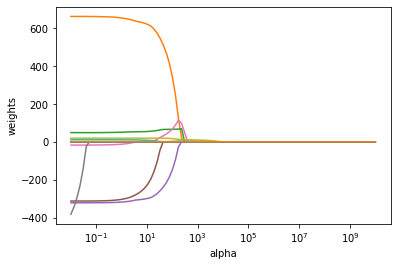

In [91]:
lasso = Lasso()
lambdalar = 10**np.linspace(10,-2,100)*0.5 
katsayilar = []

for i in lambdalar:
    lasso.set_params(alpha=i)
    lasso.fit(X_train, y_train)
    katsayilar.append(lasso.coef_)
  
import matplotlib.pyplot as plt  
ax = plt.gca()
ax.plot(lambdalar*2, katsayilar)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [92]:
lasso_model.predict(X_test) # Tahmin

array([2755.75423801, 2329.06560208, 1696.10402746, 2870.89604988,
       3018.58295935, 1889.66240831, 2238.17951242, 2200.38997758,
       1766.80891642, 2679.08955208, 2232.97154596, 2049.88660217,
       1793.454696  , 1879.41400416, 2229.18628624, 2235.48915722,
       1728.55375546, 1994.07141641, 1995.04918948, 2018.00664221,
       1970.95415899, 2490.44141341, 1972.98096667, 2227.70683013,
       2239.2132211 , 2038.09396957, 2682.15027376, 1642.23831712,
       1979.40231575, 2241.14845826, 2061.70295991, 2361.62443804,
       2354.2329485 , 1685.49019605, 1731.42157565, 2225.2978575 ,
       2889.07201184, 1728.55375546, 2633.75693834, 1866.26581186,
       2751.69834847, 2438.22495467, 2036.81334528, 3002.67198798,
       3959.26315075, 1726.96740273, 2037.03061788, 1737.0022903 ,
       2420.13176034, 2159.75010247, 1528.20680905, 1728.55375546,
       2360.80617622, 2579.53631409, 2163.2313763 , 3156.24839734,
       3317.37347233, 1926.79259616, 1990.15194542, 2341.38819

In [93]:
y_pred = lasso_model.predict(X_train)
print("Train R2 Score: ", r2_score(y_train, y_pred))
print("----"*30)
y_pred = lasso_model.predict(X_test)
print("Test R2 Score: ", r2_score(y_test, y_pred))
print("----"*30)
y_pred = lasso_model.predict(X_test)
print("Ortalama Test Hatası: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("----"*30)
y_pred = lasso_model.predict(X_train)
print("Ortalama Eğitim Hatası: ", np.sqrt(mean_squared_error(y_train,y_pred)))
print("----"*30)
print(lasso_model.intercept_)
print(lasso_model.coef_)

Train R2 Score:  0.7718970967206553
------------------------------------------------------------------------------------------------------------------------
Test R2 Score:  0.7119516290184978
------------------------------------------------------------------------------------------------------------------------
Ortalama Test Hatası:  378.37551532545336
------------------------------------------------------------------------------------------------------------------------
Ortalama Eğitim Hatası:  345.36462479316793
------------------------------------------------------------------------------------------------------------------------
1177.2846932421407
[-4.00635395e-01  6.59079824e+02  4.89136478e+01 -2.82561268e-01
 -3.20473130e+02 -3.10422978e+02 -1.61225321e+01 -0.00000000e+00
  1.93428013e+01  1.08273032e+01  3.99014596e-01  3.82825738e-01]


#### Model Tuning

In [94]:
lasso_cv_model = LassoCV(alphas = None, 
                         cv = 10, 
                         max_iter = 10000, 
                         normalize = True)

In [95]:
lasso_cv_model.fit(X_train,y_train)

LassoCV(cv=10, max_iter=10000, normalize=True)

In [96]:
lasso_cv_model.alpha_

0.032610980802092786

In [97]:
lasso_tuned = Lasso(alpha = lasso_cv_model.alpha_)

In [98]:
lasso_tuned.fit(X_train, y_train)

Lasso(alpha=0.032610980802092786)

In [99]:
y_pred = lasso_tuned.predict(X_train)
print("Train R2 Score: ", r2_score(y_train, y_pred))
print("----"*30)
y_pred = lasso_tuned.predict(X_test)
print("Test R2 Score: ", r2_score(y_test, y_pred))
print("----"*30)
y_pred = lasso_tuned.predict(X_test)
print("Ortalama Test Hatası: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("----"*30)
y_pred = lasso_tuned.predict(X_train)
print("Ortalama Eğitim Hatası: ", np.sqrt(mean_squared_error(y_train,y_pred)))
print("----"*30)
print(lasso_tuned.intercept_)
print(lasso_tuned.coef_)

Train R2 Score:  0.7718956391143748
------------------------------------------------------------------------------------------------------------------------
Test R2 Score:  0.7119147909521875
------------------------------------------------------------------------------------------------------------------------
Ortalama Test Hatası:  378.3997094853744
------------------------------------------------------------------------------------------------------------------------
Ortalama Eğitim Hatası:  345.3657282531299
------------------------------------------------------------------------------------------------------------------------
1177.2358163370595
[-4.00821582e-01  6.60276775e+02  4.84574372e+01 -5.06952216e-01
 -3.21017981e+02 -3.11620295e+02 -1.67250776e+01 -0.00000000e+00
  1.93456854e+01  1.08585154e+01  4.01693414e-01  3.82755775e-01]


### ElasticNet (eNet) Regression

In [100]:
hit = pd.read_csv("Kalori.csv",usecols = [2,3,4,5,6,7,8,9,10,11,12,13,14])
df = hit.copy()
df.dropna(inplace=True)
y = df["Calories"]
X_ = df.drop(["Calories"], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X_ , y , test_size=0.3 , random_state=42)

print("X_train", X_train.shape)
print("y_train",y_train.shape)
print("X_test",X_test.shape)
print("y_test",y_test.shape)
training = df.copy()
print("training", training.shape)

X_train (658, 12)
y_train (658,)
X_test (282, 12)
y_test (282,)
training (940, 13)


In [101]:
enet_model = ElasticNet().fit(X_train, y_train)

In [102]:
enet_model.alpha

1.0

In [103]:
y_pred = enet_model.predict(X_train)
print("Train R2 Score: ", r2_score(y_train, y_pred))
print("----"*30)
y_pred = enet_model.predict(X_test)
print("Test R2 Score: ", r2_score(y_test, y_pred))
print("----"*30)
y_pred = enet_model.predict(X_test)
print("Ortalama Test Hatası: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("----"*30)
y_pred = enet_model.predict(X_train)
print("Ortalama Eğitim Hatası: ", np.sqrt(mean_squared_error(y_train,y_pred)))
print("----"*30)
print(enet_model.intercept_)
print(enet_model.coef_)

Train R2 Score:  0.6969674525105714
------------------------------------------------------------------------------------------------------------------------
Test R2 Score:  0.6544641917108257
------------------------------------------------------------------------------------------------------------------------
Ortalama Test Hatası:  414.41631434219136
------------------------------------------------------------------------------------------------------------------------
Ortalama Eğitim Hatası:  398.06783176234205
------------------------------------------------------------------------------------------------------------------------
1174.5424503400336
[ -0.19836093 144.36820837 145.46493481  16.50519387 -95.29609807
 -35.13523557 107.6059859    0.          15.55282073   4.58529401
   0.32191895   0.40490154]


In [104]:
enet_model.predict(X_test)

array([2610.25332707, 2402.64805271, 1719.55962791, 2680.07972827,
       2774.86647077, 1859.54633384, 1934.75351768, 2227.76844303,
       1780.66919031, 2524.19680416, 2404.44141541, 2409.42999066,
       1806.41967406, 1911.8072398 , 2372.93645972, 2415.68376815,
       1757.60066825, 1887.50878496, 2191.25561353, 2246.22470002,
       2197.38408078, 2572.7434013 , 2042.1514475 , 2378.42606735,
       2376.07478433, 1995.60368436, 2600.02581158, 1719.13575067,
       1966.4118217 , 2219.79283714, 2183.79147433, 2508.86818681,
       2257.48200143, 1700.60408766, 1761.03389049, 2090.63474119,
       2634.86080891, 1757.60066825, 2567.27629923, 1884.66656737,
       2653.18452797, 2295.67999459, 2025.41832936, 2932.62892245,
       3541.17403542, 1756.72424196, 2120.0448582 , 1634.41420819,
       2321.12120922, 2231.0370334 , 1603.1186267 , 1757.60066825,
       2224.02250057, 2437.9031733 , 2159.4322602 , 3131.22110962,
       3135.33547072, 1966.4104553 , 2078.48971288, 2356.07967

#### Model Tuning

In [105]:
enet_cv_model = ElasticNetCV(cv = 10, random_state = 42).fit(X_train, y_train)

In [106]:
enet_cv_model.alpha_

4683.890655583375

In [107]:
enet_cv_model

ElasticNetCV(cv=10, random_state=42)

In [108]:
enet_tuned = ElasticNet(alpha = enet_cv_model.alpha_).fit(X_train,y_train)

In [109]:
y_pred = enet_tuned.predict(X_train)
print("Train R2 Score: ", r2_score(y_train, y_pred))
print("----"*30)
y_pred = enet_tuned.predict(X_test)
print("Test R2 Score: ", r2_score(y_test, y_pred))
print("----"*30)
y_pred = enet_tuned.predict(X_test)
print("Ortalama Test Hatası: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("----"*30)
y_pred = enet_tuned.predict(X_train)
print("Ortalama Eğitim Hatası: ", np.sqrt(mean_squared_error(y_train,y_pred)))
print("----"*30)
print(enet_tuned.intercept_)
print(enet_tuned.coef_)

Train R2 Score:  0.4024674694020097
------------------------------------------------------------------------------------------------------------------------
Test R2 Score:  0.3020500308008023
------------------------------------------------------------------------------------------------------------------------
Ortalama Test Hatası:  588.9825933236239
------------------------------------------------------------------------------------------------------------------------
Ortalama Eğitim Hatası:  558.9760775434526
------------------------------------------------------------------------------------------------------------------------
1404.5082755246196
[ 0.08482626  0.          0.          0.          0.         -0.
  0.          0.          0.81490512  0.         -0.          0.22534878]


### En Yakın Komşu
Gözlem birimlerinin birbirine olan benzerlikleri üzerinden tahmin yapar

In [110]:
hit = pd.read_csv("Kalori.csv",usecols = [2,3,4,5,6,7,8,9,10,11,12,13,14])
df = hit.copy()
df.dropna(inplace=True)
y = df["Calories"]
X = df.drop(["Calories"], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X , y , test_size=0.25 , random_state=42)

print("X_train", X_train.shape)
print("y_train",y_train.shape)
print("X_test",X_test.shape)
print("y_test",y_test.shape)
training = df.copy()
print("training", training.shape)

X_train (705, 12)
y_train (705,)
X_test (235, 12)
y_test (235,)
training (940, 13)


In [111]:
knn_model = KNeighborsRegressor().fit(X_train, y_train)

In [112]:
y_pred = knn_model.predict(X_test)

print("test hatası:" , np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE = [] 
#cross validation yapmadan hatalara bir bakalim
for k in range(10):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_train) 
    rmse = np.sqrt(mean_squared_error(y_train,y_pred)) 
    RMSE.append(rmse) 
    print("k =" , k , "için RMSE değeri: ", rmse)

test hatası: 592.844832341518
k = 1 için RMSE değeri:  520.8641469466564
k = 2 için RMSE değeri:  435.30789462237806
k = 3 için RMSE değeri:  460.5323980752179
k = 4 için RMSE değeri:  478.51136313089796
k = 5 için RMSE değeri:  487.9729679758678
k = 6 için RMSE değeri:  509.8516282807383
k = 7 için RMSE değeri:  515.8741209818521
k = 8 için RMSE değeri:  515.8030619691028
k = 9 için RMSE değeri:  517.5675448052904
k = 10 için RMSE değeri:  519.6519144294696


In [113]:
#GridSearchCV ile optimum k sayisinin belirlenmesi
knn_params = {'n_neighbors': np.arange(1,50,1)}
knn = KNeighborsRegressor()
knn_cv_model = GridSearchCV(knn, knn_params, cv = 10)
knn_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [114]:
knn_cv_model.best_params_["n_neighbors"]# en iyi değer

33

In [115]:
RMSE = [] 
RMSE_CV = []
for k in range(10):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_train) 
    rmse = np.sqrt(mean_squared_error(y_train,y_pred)) 
    rmse_cv = np.sqrt(-1*cross_val_score(knn_model, X_train, y_train, cv=10, 
                                         scoring = "neg_mean_squared_error").mean())
    #cross validation olmadan hatalar
    RMSE.append(rmse) 
    #cross validation kullanilarak alindan hatalar
    RMSE_CV.append(rmse_cv)
    print("k =" , k , "için RMSE değeri: ", rmse, "RMSE_CV değeri: ", rmse_cv )

k = 1 için RMSE değeri:  520.8641469466564 RMSE_CV değeri:  865.0540194458124
k = 2 için RMSE değeri:  435.30789462237806 RMSE_CV değeri:  693.3743711708556
k = 3 için RMSE değeri:  460.5323980752179 RMSE_CV değeri:  673.8069322974293
k = 4 için RMSE değeri:  478.51136313089796 RMSE_CV değeri:  629.3893604676834
k = 5 için RMSE değeri:  487.9729679758678 RMSE_CV değeri:  605.6544562609379
k = 6 için RMSE değeri:  509.8516282807383 RMSE_CV değeri:  590.0460402132336
k = 7 için RMSE değeri:  515.8741209818521 RMSE_CV değeri:  587.1206467248609
k = 8 için RMSE değeri:  515.8030619691028 RMSE_CV değeri:  583.9265019767167
k = 9 için RMSE değeri:  517.5675448052904 RMSE_CV değeri:  582.6677362395396
k = 10 için RMSE değeri:  519.6519144294696 RMSE_CV değeri:  580.3281762422396


In [116]:
knn_tuned = KNeighborsRegressor(n_neighbors =33)
knn_tuned.fit(X_train, y_train)
np.sqrt(mean_squared_error(y_test, knn_tuned.predict(X_test)))

598.0866199821401

In [117]:
y_pred = knn_tuned.predict(X_train)
print("Train R2 Score: ", r2_score(y_train, y_pred))
print("----"*30)
y_pred = knn_tuned.predict(X_test)
print("Test R2 Score: ", r2_score(y_test, y_pred))
print("----"*30)
y_pred = knn_tuned.predict(X_test)
print("Ortalama Test Hatası: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("----"*30)
y_pred = knn_tuned.predict(X_train)
print("Ortalama Eğitim Hatası: ", np.sqrt(mean_squared_error(y_train,y_pred)))
print("----"*30)

Train R2 Score:  0.41505912997389705
------------------------------------------------------------------------------------------------------------------------
Test R2 Score:  0.2700652681045095
------------------------------------------------------------------------------------------------------------------------
Ortalama Test Hatası:  598.0866199821401
------------------------------------------------------------------------------------------------------------------------
Ortalama Eğitim Hatası:  553.368815492227
------------------------------------------------------------------------------------------------------------------------


### Destek Vektör

In [118]:
hit = pd.read_csv("Kalori.csv",usecols = [2,3,4,5,6,7,8,9,10,11,12,13,14])
df = hit.copy()
df.dropna(inplace=True)
y = df["Calories"]
X_ = df.drop(["Calories"], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X_ , y , test_size=0.25 , random_state=42)

print("X_train", X_train.shape)
print("y_train",y_train.shape)
print("X_test",X_test.shape)
print("y_test",y_test.shape)
training = df.copy()
print("training", training.shape)

X_train (705, 12)
y_train (705,)
X_test (235, 12)
y_test (235,)
training (940, 13)


In [119]:
svr_model = LinearSVR().fit(X_train, y_train)

In [120]:
y_pred = svr_model.predict(X_train)
print("Train R2 Score: ", r2_score(y_train, y_pred))
print("----"*30)
y_pred = svr_model.predict(X_test)
print("Test R2 Score: ", r2_score(y_test, y_pred))
print("----"*30)
y_pred = svr_model.predict(X_test)
print("Ortalama Test Hatası: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("----"*30)
y_pred = svr_model.predict(X_train)
print("Ortalama Eğitim Hatası: ", np.sqrt(mean_squared_error(y_train,y_pred)))
print("----"*30)
print(svr_model.intercept_)
print(svr_model.coef_)

Train R2 Score:  0.25015336678831157
------------------------------------------------------------------------------------------------------------------------
Test R2 Score:  0.1711871765656583
------------------------------------------------------------------------------------------------------------------------
Ortalama Test Hatası:  637.3093693703233
------------------------------------------------------------------------------------------------------------------------
Ortalama Eğitim Hatası:  626.5343997638109
------------------------------------------------------------------------------------------------------------------------
[2.6556033]
[ 1.45626523e-02  1.40036526e+00  1.42821498e+00  2.37261799e-01
 -4.77380806e-01 -1.15293165e-01  1.24704834e+00 -4.68654650e-03
  1.41395944e+01  7.10744256e+00  3.83040812e+00  1.24233102e+00]


#### Model Tuning

In [121]:
svr_params = {"C": np.arange(0.1,2,0.1)}
svr_cv_model = GridSearchCV(svr_model, svr_params, cv = 10).fit(X_train,y_train)

In [122]:
svr_cv_model.best_params_

{'C': 1.2000000000000002}

In [123]:
svr_tuned = LinearSVR(C = pd.Series(svr_cv_model.best_params_)[0]).fit(X_train, y_train)

In [124]:
y_pred = svr_tuned.predict(X_train)
print("Train R2 Score: ", r2_score(y_train, y_pred))
print("----"*30)
y_pred = svr_tuned.predict(X_test)
print("Test R2 Score: ", r2_score(y_test, y_pred))
print("----"*30)
y_pred = svr_tuned.predict(X_test)
print("Ortalama Test Hatası: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("----"*30)
y_pred = svr_tuned.predict(X_train)
print("Ortalama Eğitim Hatası: ", np.sqrt(mean_squared_error(y_train,y_pred)))
print("----"*30)
print(svr_tuned.intercept_)
print(svr_tuned.coef_)

Train R2 Score:  -0.05027645528992131
------------------------------------------------------------------------------------------------------------------------
Test R2 Score:  -0.10755581714889573
------------------------------------------------------------------------------------------------------------------------
Ortalama Test Hatası:  736.7241113254998
------------------------------------------------------------------------------------------------------------------------
Ortalama Eğitim Hatası:  741.4989029027965
------------------------------------------------------------------------------------------------------------------------
[2.72965504]
[-7.83178185e-02  1.41335496e+00  1.43999712e+00  2.38714696e-01
 -4.61952463e-01 -1.18889087e-01  1.21169776e+00 -4.63940599e-03
  1.43848078e+01  7.10268778e+00  3.92916495e+00  1.44425844e+00]


In [125]:
#bir veriseti olusturup lineer regresyon ile SVR'yi gorsel olarak karsilastiralim
np.random.seed(3)

x_sim = np.random.uniform(2, 10, 145)
y_sim = np.sin(x_sim) + np.random.normal(0, 0.4, 145)
#aykırı gözlemler
x_outliers = np.arange(2.5, 5, 0.5)
y_outliers = -5*np.ones(5)

x_sim_idx = np.argsort(np.concatenate([x_sim, x_outliers]))
x_sim = np.concatenate([x_sim, x_outliers])[x_sim_idx]
y_sim = np.concatenate([y_sim, y_outliers])[x_sim_idx]

In [126]:
#lineer regresyon
ols = LinearRegression()
ols.fit(np.sin(x_sim[:, np.newaxis]), y_sim)
ols_pred = ols.predict(np.sin(x_sim[:, np.newaxis]))

#SVR
eps = 0.1 #default degeri
#rbf=radial bases function (dogrusal olmayan bir form)
svr = SVR(kernel='rbf', epsilon = eps)
svr.fit(x_sim[:, np.newaxis], y_sim)
svr_pred = svr.predict(x_sim[:, np.newaxis])

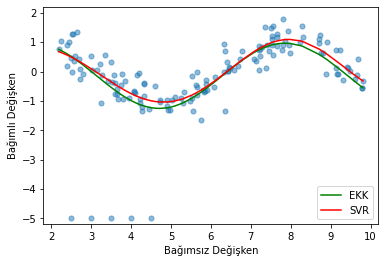

In [127]:
plt.scatter(x_sim, y_sim, alpha=0.5, s=26)
plt_ols, = plt.plot(x_sim, ols_pred, 'g')
plt_svr, = plt.plot(x_sim, svr_pred, color='r')
plt.xlabel("Bağımsız Değişken")
plt.ylabel("Bağımlı Değişken")
plt.ylim(-5.2, 2.2)
plt.legend([plt_ols, plt_svr], ['EKK', 'SVR'], loc = 4);

In [128]:
svr_rbf = SVR(kernel="rbf").fit(X_train, y_train)

In [129]:
y_pred = svr_rbf.predict(X_train)
print("Train R2 Score: ", r2_score(y_train, y_pred))
print("----"*30)
y_pred = svr_rbf.predict(X_test)
print("Test R2 Score: ", r2_score(y_test, y_pred))
print("----"*30)
y_pred = svr_rbf.predict(X_test)
print("Ortalama Test Hatası: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("----"*30)
y_pred = svr_rbf.predict(X_train)
print("Ortalama Eğitim Hatası: ", np.sqrt(mean_squared_error(y_train,y_pred)))
print("----"*30)

Train R2 Score:  0.042883865806820576
------------------------------------------------------------------------------------------------------------------------
Test R2 Score:  0.009917427347712504
------------------------------------------------------------------------------------------------------------------------
Ortalama Test Hatası:  696.5587954416325
------------------------------------------------------------------------------------------------------------------------
Ortalama Eğitim Hatası:  707.8496416612237
------------------------------------------------------------------------------------------------------------------------


In [130]:
svr_params = {"C": [6850000]}
svr_cv_model = GridSearchCV(svr_rbf,svr_params, cv = 10)
svr_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVR(), param_grid={'C': [6850000]})

In [131]:
svr_cv_model.best_params_

{'C': 6850000}

In [132]:
svr_tuned = SVR(kernel="rbf", C = pd.Series(svr_cv_model.best_params_)[0]).fit(X_train, 
                                                                        y_train)

In [133]:
y_pred = svr_tuned.predict(X_train)
print("Train R2 Score: ", r2_score(y_train, y_pred))
print("----"*30)
y_pred = svr_tuned.predict(X_test)
print("Test R2 Score: ", r2_score(y_test, y_pred))
print("----"*30)
y_pred = svr_tuned.predict(X_test)
print("Ortalama Test Hatası: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("----"*30)
y_pred = svr_tuned.predict(X_train)
print("Ortalama Eğitim Hatası: ", np.sqrt(mean_squared_error(y_train,y_pred)))
print("----"*30)

Train R2 Score:  0.582117068777569
------------------------------------------------------------------------------------------------------------------------
Test R2 Score:  0.5191887454813844
------------------------------------------------------------------------------------------------------------------------
Ortalama Test Hatası:  485.41074404467446
------------------------------------------------------------------------------------------------------------------------
Ortalama Eğitim Hatası:  467.7200787368225
------------------------------------------------------------------------------------------------------------------------


### Yapar Sinir Ağları

In [134]:
hit = pd.read_csv("Kalori.csv",usecols = [2,3,4,5,6,7,8,9,10,11,12,13,14])
df = hit.copy()
df.dropna(inplace=True)
y = df["Calories"]
X_ = df.drop(["Calories"], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X_ , y , test_size=0.25 , random_state=42)

print("X_train", X_train.shape)
print("y_train",y_train.shape)
print("X_test",X_test.shape)
print("y_test",y_test.shape)
training = df.copy()
print("training", training.shape)

X_train (705, 12)
y_train (705,)
X_test (235, 12)
y_test (235,)
training (940, 13)


In [135]:
#değişken standartlaştırması
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [136]:
mlp_model = MLPRegressor().fit(X_train_scaled, y_train)
print(mlp_model)
print(mlp_model.n_layers_)
print(mlp_model.hidden_layer_sizes)

MLPRegressor()
3
(100,)


In [137]:
y_pred = mlp_model.predict(X_train_scaled)
print("Train R2 Score: ", r2_score(y_train, y_pred))
print("----"*30)
y_pred = mlp_model.predict(X_test_scaled)
print("Test R2 Score: ", r2_score(y_test, y_pred))
print("----"*30)
y_pred = mlp_model.predict(X_test_scaled)
print("Ortalama Test Hatası: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("----"*30)
y_pred = mlp_model.predict(X_train_scaled)
print("Ortalama Eğitim Hatası: ", np.sqrt(mean_squared_error(y_train,y_pred)))
print("----"*30)

Train R2 Score:  -6.913394793454001
------------------------------------------------------------------------------------------------------------------------
Test R2 Score:  -7.94024396380766
------------------------------------------------------------------------------------------------------------------------
Ortalama Test Hatası:  2093.132675284417
------------------------------------------------------------------------------------------------------------------------
Ortalama Eğitim Hatası:  2035.3547468229303
------------------------------------------------------------------------------------------------------------------------


#### Model Tuning

In [138]:
mlp_params = {'alpha': [0.7],'hidden_layer_sizes': [(500,250)],'activation': ['relu']}

In [139]:
t1 =  datetime.now()
mlp_cv_model = GridSearchCV(mlp_model, mlp_params, cv = 10)
mlp_cv_model.fit(X_train_scaled, y_train)
t2 =  datetime.now()
print(t2-t1)

0:00:51.599266


In [140]:
mlp_model = MLPRegressor().fit(X_train_scaled, y_train)

In [141]:
mlp_tuned = MLPRegressor(activation=mlp_cv_model.best_params_['activation'],
                         alpha = mlp_cv_model.best_params_['alpha'], 
                         hidden_layer_sizes = mlp_cv_model.best_params_['hidden_layer_sizes'])
print(mlp_tuned)
print(mlp_tuned.activation)

MLPRegressor(alpha=0.7, hidden_layer_sizes=(500, 250))
relu


In [142]:
mlp_tuned.fit(X_train_scaled, y_train)

MLPRegressor(alpha=0.7, hidden_layer_sizes=(500, 250))

In [143]:
y_pred = mlp_tuned.predict(X_train_scaled)
print("Train R2 Score: ", r2_score(y_train, y_pred))
print("----"*30)
y_pred = mlp_tuned.predict(X_test_scaled)
print("Test R2 Score: ", r2_score(y_test, y_pred))
print("----"*30)
y_pred = mlp_tuned.predict(X_test_scaled)
print("Ortalama Test Hatası: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("----"*30)
y_pred = mlp_tuned.predict(X_train_scaled)
print("Ortalama Eğitim Hatası: ", np.sqrt(mean_squared_error(y_train,y_pred)))
print("----"*30)

Train R2 Score:  0.662072309162322
------------------------------------------------------------------------------------------------------------------------
Test R2 Score:  0.5894261101070801
------------------------------------------------------------------------------------------------------------------------
Ortalama Test Hatası:  448.5571007146049
------------------------------------------------------------------------------------------------------------------------
Ortalama Eğitim Hatası:  420.6012782897995
------------------------------------------------------------------------------------------------------------------------


### Karar Ağaçları / Classification and Regression Trees (CART)
Temel amaç veriseti içerisindeki karmaşık yapıları basit karar yapılarına dönüştürmektir.
Heterojen verisetleri belirlenmiş bir hedef değişkene göre homojen alt gruplara ayrılır.


In [144]:
hit = pd.read_csv("Kalori.csv",usecols = [2,3,4,5,6,7,8,9,10,11,12,13,14])
df = hit.copy()
df.dropna(inplace=True)
y = df["Calories"]
X_ = df.drop(["Calories"], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X_ , y , test_size=0.25 , random_state=42)

print("X_train", X_train.shape)
print("y_train",y_train.shape)
print("X_test",X_test.shape)
print("y_test",y_test.shape)
training = df.copy()
print("training", training.shape)

X_train (705, 12)
y_train (705,)
X_test (235, 12)
y_test (235,)
training (940, 13)


In [145]:
cart_model = DecisionTreeRegressor()
cart_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [146]:
#ilkel test hatasina bir bakalim
cart_model = DecisionTreeRegressor()
cart_model.fit(X_train, y_train)
y_pred = cart_model.predict(X_train)
print("Train R2 Score: ", r2_score(y_train, y_pred))
print("----"*30)
y_pred = cart_model.predict(X_test)
print("Test R2 Score: ", r2_score(y_test, y_pred))
print("----"*30)
y_pred = cart_model.predict(X_test)
print("Ortalama Test Hatası: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("----"*30)
y_pred = cart_model.predict(X_train)
print("Ortalama Eğitim Hatası: ", np.sqrt(mean_squared_error(y_train,y_pred)))
print("----"*30)

Train R2 Score:  0.965576900110839
------------------------------------------------------------------------------------------------------------------------
Test R2 Score:  0.5274716616087038
------------------------------------------------------------------------------------------------------------------------
Ortalama Test Hatası:  481.21150477335965
------------------------------------------------------------------------------------------------------------------------
Ortalama Eğitim Hatası:  134.2405387573474
------------------------------------------------------------------------------------------------------------------------


#### Model Tuning

In [147]:
#derleme uzun sürmesin diye bulduğum en uygun aralığı kapsayacak değerleri yazdım
cart_params = {"min_samples_split": [44],
               "max_leaf_nodes": [22]}
cart_cv_model = GridSearchCV(cart_model, cart_params, cv = 10)
cart_cv_model.fit(X_train, y_train)
print(cart_cv_model.best_params_)
cart_tuned = DecisionTreeRegressor(max_leaf_nodes = cart_cv_model.best_params_['max_leaf_nodes'], 
                                   min_samples_split = cart_cv_model.best_params_['min_samples_split'])
cart_tuned.fit(X_train, y_train)
y_pred = cart_tuned.predict(X_train)
print("Train R2 Score: ", r2_score(y_train, y_pred))
print("----"*30)
y_pred = cart_tuned.predict(X_test)
print("Test R2 Score: ", r2_score(y_test, y_pred))
print("----"*30)
y_pred = cart_tuned.predict(X_test)
print("Ortalama Test Hatası: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("----"*30)
y_pred = cart_tuned.predict(X_train)
print("Ortalama Eğitim Hatası: ", np.sqrt(mean_squared_error(y_train,y_pred)))
print("----"*30)


{'max_leaf_nodes': 22, 'min_samples_split': 44}
Train R2 Score:  0.7179927564177077
------------------------------------------------------------------------------------------------------------------------
Test R2 Score:  0.47303661909868633
------------------------------------------------------------------------------------------------------------------------
Ortalama Test Hatası:  508.17382392108436
------------------------------------------------------------------------------------------------------------------------
Ortalama Eğitim Hatası:  384.2278403667223
------------------------------------------------------------------------------------------------------------------------


### Random Forests
Temeli birden çok karar ağacının ürettiği tahminlerin bir araya getirilerek değerlendirilmesidir.


In [148]:
hit = pd.read_csv("Kalori.csv",usecols = [2,3,4,5,6,7,8,9,10,11,12,13,14])
df = hit.copy()
df.dropna(inplace=True)
y = df["Calories"]
X_ = df.drop(["Calories"], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X_ , y , test_size=0.25 , random_state=42)

print("X_train", X_train.shape)
print("y_train",y_train.shape)
print("X_test",X_test.shape)
print("y_test",y_test.shape)
training = df.copy()
print("training", training.shape)

X_train (705, 12)
y_train (705,)
X_test (235, 12)
y_test (235,)
training (940, 13)


In [149]:
rf_model = RandomForestRegressor(random_state = 42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [150]:
y_pred = rf_model.predict(X_train)
print("Train R2 Score: ", r2_score(y_train, y_pred))
print("----"*30)
y_pred = rf_model.predict(X_test)
print("Test R2 Score: ", r2_score(y_test, y_pred))
print("----"*30)
y_pred = rf_model.predict(X_test)
print("Ortalama Test Hatası: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("----"*30)
y_pred = rf_model.predict(X_train)
print("Ortalama Eğitim Hatası: ", np.sqrt(mean_squared_error(y_train,y_pred)))
print("----"*30)

Train R2 Score:  0.927646644137188
------------------------------------------------------------------------------------------------------------------------
Test R2 Score:  0.6620697059789011
------------------------------------------------------------------------------------------------------------------------
Ortalama Test Hatası:  406.9449237450008
------------------------------------------------------------------------------------------------------------------------
Ortalama Eğitim Hatası:  194.62025511963043
------------------------------------------------------------------------------------------------------------------------


#### Model Tuning

In [151]:
#bulduğum en iyi parametreleri uzun sürmemesi için yazdım
rf_params = {'max_depth': [13],
            'max_features': [8],
            'n_estimators' : [2400]}
rf_model = RandomForestRegressor(random_state = 42)
rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv = 10, 
                            n_jobs = -1)
rf_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [13], 'max_features': [8],
                         'n_estimators': [2400]})

In [152]:

rf_cv_model.best_params_

{'max_depth': 13, 'max_features': 8, 'n_estimators': 2400}

In [153]:
rf_tuned = RandomForestRegressor(max_depth  = rf_cv_model.best_params_['max_depth'], 
                                 max_features = rf_cv_model.best_params_['max_features'], 
                                 n_estimators =rf_cv_model.best_params_['n_estimators'])

In [154]:
rf_tuned.fit(X_train, y_train)
y_pred = rf_tuned.predict(X_train)
print("Train R2 Score: ", r2_score(y_train, y_pred))
print("----"*30)
y_pred = rf_tuned.predict(X_test)
print("Test R2 Score: ", r2_score(y_test, y_pred))
print("----"*30)
y_pred = rf_tuned.predict(X_test)
print("Ortalama Test Hatası: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("----"*30)
y_pred = rf_tuned.predict(X_train)
print("Ortalama Eğitim Hatası: ", np.sqrt(mean_squared_error(y_train,y_pred)))
print("----"*30)

Train R2 Score:  0.9213282189269656
------------------------------------------------------------------------------------------------------------------------
Test R2 Score:  0.6682439873861372
------------------------------------------------------------------------------------------------------------------------
Ortalama Test Hatası:  403.2101663202159
------------------------------------------------------------------------------------------------------------------------
Ortalama Eğitim Hatası:  202.9402491047508
------------------------------------------------------------------------------------------------------------------------


In [155]:
#degiskenlerin onem duzeyine bir bakalim.
Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100},
                         index = X_train.columns)

Text(0.5, 0, 'Değişken Önem Düzeyleri')

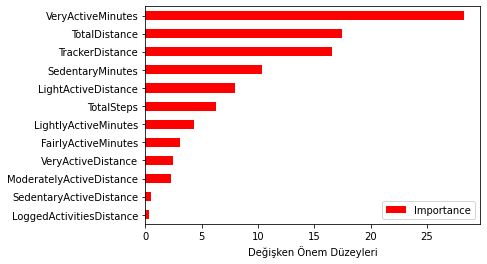

In [156]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")

### Gradient Boosting Machines (GBM)
AdaBoost'un sınıflandırma ve regresyon problemlerine kolayca uyarlanabilen genellenmiş bir versiyonudur.

Adaptive Boosting (AdaBoost) zayıf sınıflandırıcıların bir araya gelerek güçlü bir sınıflandırıcı oluşturması için geliştirilen bir yöntemdir.

In [157]:
hit = pd.read_csv("Kalori.csv",usecols = [2,3,4,5,6,7,8,9,10,11,12,13,14])
df = hit.copy()
df.dropna(inplace=True)
y = df["Calories"]
X_ = df.drop(["Calories"], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X_ , y , test_size=0.25 , random_state=42)

print("X_train", X_train.shape)
print("y_train",y_train.shape)
print("X_test",X_test.shape)
print("y_test",y_test.shape)
training = df.copy()
print("training", training.shape)

X_train (705, 12)
y_train (705,)
X_test (235, 12)
y_test (235,)
training (940, 13)


In [158]:
gbm_model = GradientBoostingRegressor()
gbm_model.fit(X_train, y_train)

GradientBoostingRegressor()

In [159]:
y_pred = gbm_model.predict(X_train)
print("Train R2 Score: ", r2_score(y_train, y_pred))
print("----"*30)
y_pred = gbm_model.predict(X_test)
print("Test R2 Score: ", r2_score(y_test, y_pred))
print("----"*30)
y_pred = gbm_model.predict(X_test)
print("Ortalama Test Hatası: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("----"*30)
y_pred = gbm_model.predict(X_train)
print("Ortalama Eğitim Hatası: ", np.sqrt(mean_squared_error(y_train,y_pred)))
print("----"*30)

Train R2 Score:  0.8474463523333592
------------------------------------------------------------------------------------------------------------------------
Test R2 Score:  0.6525805959314188
------------------------------------------------------------------------------------------------------------------------
Ortalama Test Hatası:  412.6188913582232
------------------------------------------------------------------------------------------------------------------------
Ortalama Eğitim Hatası:  282.5985935650757
------------------------------------------------------------------------------------------------------------------------


#### Model Tuning

In [160]:
gbm_params = {
    'learning_rate': [0.15],
    'max_depth': [65],
    'n_estimators': [2030],
    'subsample': [0.65],
}

In [161]:
#algoritmanın calisma zamanina da bir bakalim
t1 =  datetime.now()
gbm = GradientBoostingRegressor()
gbm_cv_model = GridSearchCV(gbm, gbm_params, cv = 10, n_jobs = -1, verbose = 2)
gbm_cv_model.fit(X_train, y_train)

t2 =  datetime.now()
print(t2-t1)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
0:00:34.171124


In [162]:
gbm_cv_model.best_params_

{'learning_rate': 0.15,
 'max_depth': 65,
 'n_estimators': 2030,
 'subsample': 0.65}

In [163]:
gbm_tuned = GradientBoostingRegressor(learning_rate = gbm_cv_model.best_params_['learning_rate'],  
                                      max_depth = gbm_cv_model.best_params_['max_depth'], 
                                      n_estimators = gbm_cv_model.best_params_['n_estimators'], 
                                      subsample = gbm_cv_model.best_params_['subsample'])

gbm_tuned = gbm_tuned.fit(X_train,y_train)

In [164]:
y_pred = gbm_tuned.predict(X_train)
print("Train R2 Score: ", r2_score(y_train, y_pred))
print("----"*30)
y_pred = gbm_tuned.predict(X_test)
print("Test R2 Score: ", r2_score(y_test, y_pred))
print("----"*30)
y_pred = gbm_tuned.predict(X_test)
print("Ortalama Test Hatası: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("----"*30)
y_pred = gbm_tuned.predict(X_train)
print("Ortalama Eğitim Hatası: ", np.sqrt(mean_squared_error(y_train,y_pred)))
print("----"*30)

Train R2 Score:  0.9655640656126774
------------------------------------------------------------------------------------------------------------------------
Test R2 Score:  0.6445687556213286
------------------------------------------------------------------------------------------------------------------------
Ortalama Test Hatası:  417.34947677195106
------------------------------------------------------------------------------------------------------------------------
Ortalama Eğitim Hatası:  134.26556191604843
------------------------------------------------------------------------------------------------------------------------


Text(0.5, 0, 'Değişken Önem Düzeyleri')

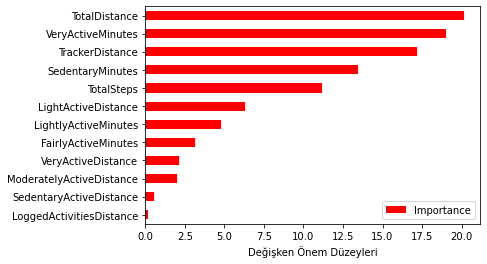

In [165]:
Importance = pd.DataFrame({"Importance": gbm_tuned.feature_importances_*100},
                         index = X_train.columns)
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")

### XGBoost (eXtreme Gradient Boosting)
XGBoost, GBM'in hız ve tahmin performansını arttırmak üzere optimize edilmiş; ölçeklenebilir ve farklı platformlara entegre edilebilir halidir.

In [166]:
hit = pd.read_csv("Kalori.csv",usecols = [2,3,4,5,6,7,8,9,10,11,12,13,14])
df = hit.copy()
df.dropna(inplace=True)
y = df["Calories"]
X_ = df.drop(["Calories"], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X_ , y , test_size=0.25 , random_state=42)

print("X_train", X_train.shape)
print("y_train",y_train.shape)
print("X_test",X_test.shape)
print("y_test",y_test.shape)
training = df.copy()
print("training", training.shape)

X_train (705, 12)
y_train (705,)
X_test (235, 12)
y_test (235,)
training (940, 13)


In [167]:
#pandas ya da numpy yerine kendi dataframeini kullanırsaniz daha performanslı calıstigi soylenmis.
DM_train = xgb.DMatrix(data = X_train, label = y_train)
DM_test = xgb.DMatrix(data = X_test, label = y_test)

In [168]:
#pandas dataframei ile de kullanılabilir.
xgb_model = XGBRegressor().fit(X_train, y_train)

In [169]:
y_pred = xgb_model.predict(X_train)
print("Train R2 Score: ", r2_score(y_train, y_pred))
print("----"*30)
y_pred = xgb_model.predict(X_test)
print("Test R2 Score: ", r2_score(y_test, y_pred))
print("----"*30)
y_pred = xgb_model.predict(X_test)
print("Ortalama Test Hatası: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("----"*30)
y_pred = xgb_model.predict(X_train)
print("Ortalama Eğitim Hatası: ", np.sqrt(mean_squared_error(y_train,y_pred)))
print("----"*30)

Train R2 Score:  0.9648590737473118
------------------------------------------------------------------------------------------------------------------------
Test R2 Score:  0.6812534651624538
------------------------------------------------------------------------------------------------------------------------
Ortalama Test Hatası:  395.22536428439827
------------------------------------------------------------------------------------------------------------------------
Ortalama Eğitim Hatası:  135.6329788855663
------------------------------------------------------------------------------------------------------------------------


#### Model Tuning

In [170]:
xgb_grid = {
     'colsample_bytree': [0.51], 
     'n_estimators':[1885],
     'max_depth': [41],
     'learning_rate': [0.38]
}


In [171]:
# bulduğum en iyi parametreleri uygulama derlemesi uzun sürmemesi için yazdım
t1 =  datetime.now()

xgb = XGBRegressor()
xgb_cv = GridSearchCV(xgb, 
                      param_grid = xgb_grid, 
                      cv = 10, 
                      n_jobs = -1,
                      verbose = 2)

xgb_cv.fit(X_train, y_train)

t2 =  datetime.now()
print(t2-t1)
print(xgb_cv.best_params_)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
0:00:04.079116
{'colsample_bytree': 0.51, 'learning_rate': 0.38, 'max_depth': 41, 'n_estimators': 1885}


In [172]:
xgb_tuned = XGBRegressor(colsample_bytree = xgb_cv.best_params_['colsample_bytree'], 
                         learning_rate = xgb_cv.best_params_['learning_rate'], 
                         max_depth = xgb_cv.best_params_['max_depth'], 
                         n_estimators = xgb_cv.best_params_['n_estimators']) 

xgb_tuned = xgb_tuned.fit(X_train,y_train)

In [173]:
y_pred = xgb_tuned.predict(X_train)
print("Train R2 Score: ", r2_score(y_train, y_pred))
print("----"*30)
y_pred = xgb_tuned.predict(X_test)
print("Test R2 Score: ", r2_score(y_test, y_pred))
print("----"*30)
y_pred = xgb_tuned.predict(X_test)
print("Ortalama Test Hatası: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("----"*30)
y_pred = xgb_tuned.predict(X_train)
print("Ortalama Eğitim Hatası: ", np.sqrt(mean_squared_error(y_train,y_pred)))
print("----"*30)

Train R2 Score:  0.9655769001099007
------------------------------------------------------------------------------------------------------------------------
Test R2 Score:  0.605448067280099
------------------------------------------------------------------------------------------------------------------------
Ortalama Test Hatası:  439.7179148861285
------------------------------------------------------------------------------------------------------------------------
Ortalama Eğitim Hatası:  134.2405387591768
------------------------------------------------------------------------------------------------------------------------


### Tüm Modellerin Karşılaştırılması

In [174]:
modeller = [
    lojj_tunned,
    pls_model,
    ridge_tuned,
    lasso_tuned,
    enet_tuned,
    knn_tuned,
    svr_tuned,
    mlp_tuned,
    cart_tuned,
    rf_tuned,
    gbm_tuned,
    xgb_tuned    
]

for model in modeller:
    if(model!=mlp_tuned):
        y_pred = model.predict(X_test)
    else:
        y_pred = model.predict(X_test_scaled)    
        
    dogruluk = r2_score(y_test, y_pred)
    isimler = model.__class__.__name__
    print("-"*30)
    print(isimler + ":" )
    print("R2 Skor: {:.4%}".format(dogruluk))

------------------------------
LinearRegression:
R2 Skor: 72.3067%
------------------------------
PLSRegression:
R2 Skor: 72.3859%
------------------------------
Ridge:
R2 Skor: 70.5860%
------------------------------
Lasso:
R2 Skor: 71.9841%
------------------------------
ElasticNet:
R2 Skor: 28.3203%
------------------------------
KNeighborsRegressor:
R2 Skor: 27.0065%
------------------------------
SVR:
R2 Skor: 51.9189%
------------------------------
MLPRegressor:
R2 Skor: 58.9426%
------------------------------
DecisionTreeRegressor:
R2 Skor: 47.3037%
------------------------------
RandomForestRegressor:
R2 Skor: 66.8244%
------------------------------
GradientBoostingRegressor:
R2 Skor: 64.4569%
------------------------------
XGBRegressor:
R2 Skor: 60.5448%


RandomForestRegressor en iyi sonucu veriyor

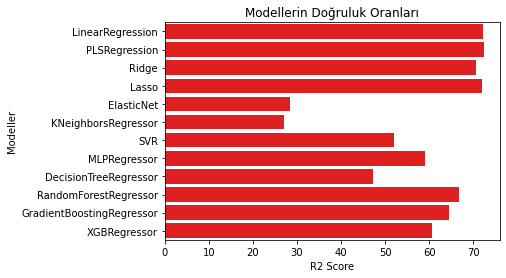

In [175]:
sonuc = []

sonuclar = pd.DataFrame(columns= ["Modeller","Accuracy"])

for model in modeller:
    
    if(model!=mlp_tuned):
        y_pred = model.predict(X_test)
    else:
        y_pred = model.predict(X_test_scaled)

    dogruluk = r2_score(y_test, y_pred)    
    isimler = model.__class__.__name__
    sonuc = pd.DataFrame([[isimler, dogruluk*100]], columns= ["Modeller","Accuracy"])
    sonuclar = sonuclar.append(sonuc)
    
    
sns.barplot(x= 'Accuracy', y = 'Modeller', data=sonuclar, color="r")
plt.xlabel('R2 Score')
plt.title('Modellerin Doğruluk Oranları');    

### Sonuç

   Seçilen modeller arasında verisetimize en uygun çalışanı, Random Forest Regressor oldu. Verisetim de Kalori yakmayı en çok etkileyen veriyi elde etmeye çalıştım. Antremanın sonlarına doğru aktifliğin en çok olduğu VeryActiveMinutes adında ki değerlerin ciddi oranda etkilediğini gözlemledim. Her ne kadar toplam adım, toplam mesafe, süre gibi değişkenler çok önemli gözükmese de VeryActiveMinutes değeri bu değerlerin sonucu ortaya çıkıyor. Yani bağımsız değişken olarak aldığımız değişkende aslında başka bir dizi değerin bağımlı değişkeni konumundadır. Veri setini yorumlama ve bir bütün olarak gözlemlemek için çok büyük kolaylık sağlıyor.

Yukarıda modelleri hem grafik olarak hem de yazılı olarak belirttim.

In [176]:
modeller = [
    lojj_tunned,
    pls_model,
    ridge_tuned,
    lasso_tuned,
    enet_tuned,
    knn_tuned,
    svr_tuned,
    mlp_tuned,
    cart_tuned,
    rf_tuned,
    gbm_tuned,
    xgb_tuned    
]

for model in modeller:
    if(model!=mlp_tuned):
        y_pred = model.predict(X_test)
    else:
        y_pred = model.predict(X_test_scaled)    
        
    dogruluk =  np.sqrt(mean_squared_error(y_test, y_pred))
    isimler = model.__class__.__name__
    print("-"*30)
    print(isimler + ":" )
    print("Hata katsayıları : {:.4}".format(dogruluk))

------------------------------
LinearRegression:
Hata katsayıları : 368.4
------------------------------
PLSRegression:
Hata katsayıları : 367.9
------------------------------
Ridge:
Hata katsayıları : 379.7
------------------------------
Lasso:
Hata katsayıları : 370.5
------------------------------
ElasticNet:
Hata katsayıları : 592.7
------------------------------
KNeighborsRegressor:
Hata katsayıları : 598.1
------------------------------
SVR:
Hata katsayıları : 485.4
------------------------------
MLPRegressor:
Hata katsayıları : 448.6
------------------------------
DecisionTreeRegressor:
Hata katsayıları : 508.2
------------------------------
RandomForestRegressor:
Hata katsayıları : 403.2
------------------------------
GradientBoostingRegressor:
Hata katsayıları : 417.3
------------------------------
XGBRegressor:
Hata katsayıları : 439.7


Linear Regression, Pl